<a href="https://colab.research.google.com/github/koud-dany/Case-Study-report/blob/main/Insights_%26amp%3B_Analytic_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Client Problem:
* A client has sent historical sales data on their products.
* The executives at the client would like advanced analytics to help them
decide where to focus sales efforts in the future.
*  There are three tables:
* Based Customer: Contains the historical pipeline/sales data
along with some customer details
* Customer Opportunity: Historical pipeline/sales
opportunity information
* Product Mapping: Maps the products to the appropriate
product category

* Using the data attached, answer the following questions:
* Which products should the company focus on going
forward?
* How can the client tell which customers/opportunities to
focus on in the future?
* Where has the client seen the most success?
They do not keep one source system, so they have to send over
several different files.  <br>
The data has been de-identified for client protection.  <br>
While the data is used on a regular basis, there have been data
submission errors in the past. <br>
Analyze the data to seek insights that articulate trends, outliers, and
other insightful analyses.

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
basepath= "/content/gdrive/MyDrive/Case_Study_Data/BaseCustomer.csv"
cusoppath= "/content/gdrive/MyDrive/Case_Study_Data/CustomerOpportunity.csv"
prodmap= "/content/gdrive/MyDrive/Case_Study_Data/ProductMapping.csv"

In [4]:
base_customer= pd.read_csv(basepath)
customer_opportunity_df= pd.read_csv(cusoppath)
product_mapping_df= pd.read_csv(prodmap)



In [5]:
base_customer

,SNAPSHOT_FISCAL_YEAR,SNAPSHOT_FISCAL_YEAR_PERIOD,customer,customer_PROGRAM_DESC,customer_TEXT,New_Client_Flag,customer_INDUSTRY_DESC,customer_salelead,customer_OFFICE_DESC,customer_REGION_DESC,customer_SECTOR_DESC,customer_SIC_TEXT,customer_SUB_SECTOR_DESC
0,2019,2019013,24065391.0,NaN,customer563,NaN,Industry1,NaN,NON-US,US - National Office,Sector22,SIC62,Sub Sector53
1,2019,2019009,24057411.0,NaN,customer2118,NaN,INDUSTRY7,NaN,PHOENIX,US - West,Sector21,SIC983,Sub Sector57
2,2020,2020004,24069264.0,NaN,customer9021,NaN,Industry1,NaN,BOSTON,US - East,Sector4,SIC618,Sub Sector44
3,2020,2020006,24476988.0,NaN,customer6698,NaN,INDUSTRY7,NaN,NON-US,US - National Office,Sector20,SIC808,Sub Sector54
4,2020,2020006,24032544.0,NaN,customer1587,NaN,INDUSTRY3,NaN,BOSTON,US - East,Sector2,SIC905,Sub Sector7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96516,2020,2020001,24039162.0,NaN,customer5654,NaN,Industry3,NaN,TAMPA,US - East,Sector11,SIC531,Sub Sector33
96517,2019,2019008,24068100.0,NaN,customer3699,NaN,INDUSTRY3,NaN,NON-US,US - National Office,Sector2,SIC903,Sub Sector7
96518,2019,2019012,24042036.0,NaN,customer9139,NaN,INDUSTRY2,NaN,CHARLOTTE,US - East,Sector10,SIC21,Sub Sector31
96519,2020,2020007,24037269.0,NaN,customer6835,NaN,Industry3,NaN,DENVER,US - Central,Sector11,SIC491,Sub Sector9


In [6]:
base_customer.columns

Index(['SNAPSHOT_FISCAL_YEAR', 'SNAPSHOT_FISCAL_YEAR_PERIOD', 'customer',
       'customer_PROGRAM_DESC', 'customer_TEXT', 'New_Client_Flag',
       'customer_INDUSTRY_DESC', 'customer_salelead', 'customer_OFFICE_DESC',
       'customer_REGION_DESC', 'customer_SECTOR_DESC', 'customer_SIC_TEXT',
       'customer_SUB_SECTOR_DESC'],
      dtype='object')

In [7]:
base_customer.isna().sum()

SNAPSHOT_FISCAL_YEAR               0
SNAPSHOT_FISCAL_YEAR_PERIOD        0
customer                          14
customer_PROGRAM_DESC          83658
customer_TEXT                     14
New_Client_Flag                92509
customer_INDUSTRY_DESC            14
customer_salelead              76368
customer_OFFICE_DESC              21
customer_REGION_DESC              21
customer_SECTOR_DESC              14
customer_SIC_TEXT                 14
customer_SUB_SECTOR_DESC          14
dtype: int64

In [8]:
base_customer.dtypes

SNAPSHOT_FISCAL_YEAR             int64
SNAPSHOT_FISCAL_YEAR_PERIOD      int64
customer                       float64
customer_PROGRAM_DESC           object
customer_TEXT                   object
New_Client_Flag                 object
customer_INDUSTRY_DESC          object
customer_salelead               object
customer_OFFICE_DESC            object
customer_REGION_DESC            object
customer_SECTOR_DESC            object
customer_SIC_TEXT               object
customer_SUB_SECTOR_DESC        object
dtype: object

In [9]:
# convert SNAPSHOT_FISCAL_YEAR column float data type into int
base_customer['SNAPSHOT_FISCAL_YEAR']= base_customer['SNAPSHOT_FISCAL_YEAR'].astype('int')

In [10]:
base_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96521 entries, 0 to 96520
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SNAPSHOT_FISCAL_YEAR         96521 non-null  int64  
 1   SNAPSHOT_FISCAL_YEAR_PERIOD  96521 non-null  int64  
 2   customer                     96507 non-null  float64
 3   customer_PROGRAM_DESC        12863 non-null  object 
 4   customer_TEXT                96507 non-null  object 
 5   New_Client_Flag              4012 non-null   object 
 6   customer_INDUSTRY_DESC       96507 non-null  object 
 7   customer_salelead            20153 non-null  object 
 8   customer_OFFICE_DESC         96500 non-null  object 
 9   customer_REGION_DESC         96500 non-null  object 
 10  customer_SECTOR_DESC         96507 non-null  object 
 11  customer_SIC_TEXT            96507 non-null  object 
 12  customer_SUB_SECTOR_DESC     96507 non-null  object 
dtypes: float64(1), i

In [11]:
base_customer.drop(['customer_PROGRAM_DESC','New_Client_Flag','customer_salelead'],axis=1, inplace=True)


In [12]:

base_customer= base_customer.dropna(subset=['customer_REGION_DESC', 'customer_OFFICE_DESC'])


In [13]:
base_customer.count()

SNAPSHOT_FISCAL_YEAR           96500
SNAPSHOT_FISCAL_YEAR_PERIOD    96500
customer                       96500
customer_TEXT                  96500
customer_INDUSTRY_DESC         96500
customer_OFFICE_DESC           96500
customer_REGION_DESC           96500
customer_SECTOR_DESC           96500
customer_SIC_TEXT              96500
customer_SUB_SECTOR_DESC       96500
dtype: int64

# ⦁	Customer Opportunity: Historical pipeline/sales opportunity information


In [14]:
customer_opportunity_df['SNAPSHOT_FISCAL_YEAR_PERIOD']

0         2020004
1         2019011
2         2020003
3         2019012
4         2019009
           ...   
550852    2019009
550853    2019013
550854    2019012
550855    2019007
550856    2019011
Name: SNAPSHOT_FISCAL_YEAR_PERIOD, Length: 550857, dtype: int64

In [15]:
customer_opportunity_df.columns

Index(['OPPORTUNITY_OPEN_CLOSED_INDICATOR', 'PHASE_NAME', 'PURSUIT_START_DATE',
       'PROJECT_START_DATE', 'PROJECT_END_DATE', 'PERIOD_WON_LOSS_ABANDONED',
       'DATE_WON_LOSS_ABANDONED', 'PRIORITY', 'customer',
       'Product_Category4_id', 'Product_Category2_text',
       'Product_Category3_text', 'PURSUIT_LEADER', 'BUYER_ROLE_DESC',
       'CURRENCY', 'PROBABILITY_PRC', 'WEIGHTED_Sales', 'Total_Sales',
       'STRATEGIC_OPPORTUNITY', 'SNAPSHOT_FY', 'SNAPSHOT_FP',
       'SNAPSHOT_FISCAL_YEAR_PERIOD', 'OPPORTUNITY_ID'],
      dtype='object')

In [16]:
customer_opportunity_df.isna().sum()

OPPORTUNITY_OPEN_CLOSED_INDICATOR         0
PHASE_NAME                                0
PURSUIT_START_DATE                        0
PROJECT_START_DATE                   237361
PROJECT_END_DATE                     248916
PERIOD_WON_LOSS_ABANDONED            476405
DATE_WON_LOSS_ABANDONED              476405
PRIORITY                             531975
customer                              31462
Product_Category4_id                  32309
Product_Category2_text                 8708
Product_Category3_text                21324
PURSUIT_LEADER                         4996
BUYER_ROLE_DESC                      490801
CURRENCY                                  0
PROBABILITY_PRC                           0
WEIGHTED_Sales                         7523
Total_Sales                               0
STRATEGIC_OPPORTUNITY                530020
SNAPSHOT_FY                               0
SNAPSHOT_FP                               0
SNAPSHOT_FISCAL_YEAR_PERIOD               0
OPPORTUNITY_ID                  

In [17]:
customer_opportunity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550857 entries, 0 to 550856
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   OPPORTUNITY_OPEN_CLOSED_INDICATOR  550857 non-null  object 
 1   PHASE_NAME                         550857 non-null  object 
 2   PURSUIT_START_DATE                 550857 non-null  object 
 3   PROJECT_START_DATE                 313496 non-null  object 
 4   PROJECT_END_DATE                   301941 non-null  object 
 5   PERIOD_WON_LOSS_ABANDONED          74452 non-null   object 
 6   DATE_WON_LOSS_ABANDONED            74452 non-null   object 
 7   PRIORITY                           18882 non-null   object 
 8   customer                           519395 non-null  float64
 9   Product_Category4_id               518548 non-null  float64
 10  Product_Category2_text             542149 non-null  object 
 11  Product_Category3_text             5295

In [18]:
customer_opportunity_df.count()

OPPORTUNITY_OPEN_CLOSED_INDICATOR    550857
PHASE_NAME                           550857
PURSUIT_START_DATE                   550857
PROJECT_START_DATE                   313496
PROJECT_END_DATE                     301941
PERIOD_WON_LOSS_ABANDONED             74452
DATE_WON_LOSS_ABANDONED               74452
PRIORITY                              18882
customer                             519395
Product_Category4_id                 518548
Product_Category2_text               542149
Product_Category3_text               529533
PURSUIT_LEADER                       545861
BUYER_ROLE_DESC                       60056
CURRENCY                             550857
PROBABILITY_PRC                      550857
WEIGHTED_Sales                       543334
Total_Sales                          550857
STRATEGIC_OPPORTUNITY                 20837
SNAPSHOT_FY                          550857
SNAPSHOT_FP                          550857
SNAPSHOT_FISCAL_YEAR_PERIOD          550857
OPPORTUNITY_ID                  

In [19]:
string_columns = customer_opportunity_df.select_dtypes(include=['object']).columns
customer_opportunity_df[string_columns] = customer_opportunity_df[string_columns].fillna(customer_opportunity_df[string_columns].mode().iloc[0])

In [20]:
customer_opportunity_df.isna().sum()

OPPORTUNITY_OPEN_CLOSED_INDICATOR        0
PHASE_NAME                               0
PURSUIT_START_DATE                       0
PROJECT_START_DATE                       0
PROJECT_END_DATE                         0
PERIOD_WON_LOSS_ABANDONED                0
DATE_WON_LOSS_ABANDONED                  0
PRIORITY                                 0
customer                             31462
Product_Category4_id                 32309
Product_Category2_text                   0
Product_Category3_text                   0
PURSUIT_LEADER                        4996
BUYER_ROLE_DESC                          0
CURRENCY                                 0
PROBABILITY_PRC                          0
WEIGHTED_Sales                        7523
Total_Sales                              0
STRATEGIC_OPPORTUNITY                    0
SNAPSHOT_FY                              0
SNAPSHOT_FP                              0
SNAPSHOT_FISCAL_YEAR_PERIOD              0
OPPORTUNITY_ID                           0
dtype: int6

In [21]:
# List of numeric column names
numeric_columns = customer_opportunity_df.select_dtypes(include=['int64', 'float64']).columns

# Iterate through numeric columns and decide whether to use mean, median, or mode
for column in numeric_columns:
    if customer_opportunity_df[column].isna().sum() > 0:
        # Check for outliers
        has_outliers = any(customer_opportunity_df[column].between(customer_opportunity_df[column].quantile(0.05), customer_opportunity_df[column].quantile(0.95)))

        if has_outliers:
            fill_value = customer_opportunity_df[column].median()  # Use median for columns with outliers
            print(f"Fill '{column}' with median")
        else:
            if customer_opportunity_df[column].dtype == 'float64':
                fill_value = customer_opportunity_df[column].mean()  # Use mean for columns without outliers (with mode handling for int64 columns)
                print(f"Fill '{column}' with mean")
            else:
                fill_value = customer_opportunity_df[column].mode().iloc[0]  # Use mode for int64 columns without outliers
                print(f"Fill '{column}' with mode")

        # Fill missing values with the chosen value
        customer_opportunity_df[column].fillna(fill_value, inplace=True)

Fill 'customer' with median
Fill 'Product_Category4_id' with median
Fill 'PURSUIT_LEADER' with median
Fill 'WEIGHTED_Sales' with median


In [22]:
customer_opportunity_df.count()

OPPORTUNITY_OPEN_CLOSED_INDICATOR    550857
PHASE_NAME                           550857
PURSUIT_START_DATE                   550857
PROJECT_START_DATE                   550857
PROJECT_END_DATE                     550857
PERIOD_WON_LOSS_ABANDONED            550857
DATE_WON_LOSS_ABANDONED              550857
PRIORITY                             550857
customer                             550857
Product_Category4_id                 550857
Product_Category2_text               550857
Product_Category3_text               550857
PURSUIT_LEADER                       550857
BUYER_ROLE_DESC                      550857
CURRENCY                             550857
PROBABILITY_PRC                      550857
WEIGHTED_Sales                       550857
Total_Sales                          550857
STRATEGIC_OPPORTUNITY                550857
SNAPSHOT_FY                          550857
SNAPSHOT_FP                          550857
SNAPSHOT_FISCAL_YEAR_PERIOD          550857
OPPORTUNITY_ID                  

In [23]:
customer_opportunity_df['PHASE_NAME'].unique()

array(['Abandoned', 'phase 5', 'phase 4', 'phase 1', 'phase 3', 'Lost',
       'phase 2', 'phase 7', 'Won', 'phase 6'], dtype=object)

# ⦁	Product Mapping: Maps the products to the appropriate product category

In [24]:
product_mapping_df

,Product_Category4_id,Category1,CATEGORY1,Category2,CategorY3,Category4,CAtegory3,Category3,CaTegory1,CategOry2,CATEgory3,category3
0,126,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,129,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,132,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,135,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,138,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
634,25029,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,25032,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636,27183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
637,27483,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
product_mapping_df.columns

Index(['Product_Category4_id', 'Category1', 'CATEGORY1', 'Category2',
       'CategorY3', 'Category4', 'CAtegory3', 'Category3', 'CaTegory1',
       'CategOry2', 'CATEgory3', 'category3'],
      dtype='object')

In [26]:
product_mapping_df.isna().sum()

Product_Category4_id      0
Category1               613
CATEGORY1               468
Category2               530
CategorY3               609
Category4               637
CAtegory3               636
Category3               381
CaTegory1               618
CategOry2               636
CATEgory3               633
category3               629
dtype: int64

In [27]:
product_mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_Category4_id  639 non-null    int64  
 1   Category1             26 non-null     float64
 2   CATEGORY1             171 non-null    float64
 3   Category2             109 non-null    float64
 4   CategorY3             30 non-null     float64
 5   Category4             2 non-null      float64
 6   CAtegory3             3 non-null      float64
 7   Category3             258 non-null    float64
 8   CaTegory1             21 non-null     float64
 9   CategOry2             3 non-null      float64
 10  CATEgory3             6 non-null      float64
 11  category3             10 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 60.0 KB


In [28]:
product_mapping_df=product_mapping_df.fillna(0.0)

In [29]:
product_mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_Category4_id  639 non-null    int64  
 1   Category1             639 non-null    float64
 2   CATEGORY1             639 non-null    float64
 3   Category2             639 non-null    float64
 4   CategorY3             639 non-null    float64
 5   Category4             639 non-null    float64
 6   CAtegory3             639 non-null    float64
 7   Category3             639 non-null    float64
 8   CaTegory1             639 non-null    float64
 9   CategOry2             639 non-null    float64
 10  CATEgory3             639 non-null    float64
 11  category3             639 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 60.0 KB


In [30]:
product_mapping_df

,Product_Category4_id,Category1,CATEGORY1,Category2,CategorY3,Category4,CAtegory3,Category3,CaTegory1,CategOry2,CATEgory3,category3
0,126,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,129,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,132,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,135,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,138,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
634,25029,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
635,25032,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
636,27183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
637,27483,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
product_mapping_df['Product_Category4_text'] = ''

# Step 1 and 2: Iterate through columns and determine original category
original_categories = ['Category1','CATEGORY1','Category2','CategorY3','Category4','CAtegory3','Category3','CaTegory1','CategOry2','CATEgory3','category3']

for index, row in product_mapping_df.iterrows():
    for category in original_categories:
        if row[f'{category}'] == 1:
            # Step 3: Assign the original category
            product_mapping_df.at[index, 'Product_Category4_text'] = category

# Drop the one-hot encoded columns
prod_mapping_text = product_mapping_df.drop(columns= original_categories)




In [32]:
prod_mapping_text['Product_Category4_text']=prod_mapping_text['Product_Category4_text'].replace({'CATEGORY1': 'Category1','CAtegory3': 'Category3','CATEgory3': 'Category3','category3': 'Category3','CategorY3': 'Category3','CategOry2':'Category2','CaTegory1':'Category1' })

# **SECTION A ---------------------------------   EDA & DC**

In [33]:
product_sales = customer_opportunity_df.groupby('Product_Category4_id')[['Total_Sales', 'WEIGHTED_Sales']].sum()
product_sales.sort_values(by='Total_Sales', ascending=False, inplace=True)
product_sales['Total_Sales in million']= product_sales['Total_Sales']/1000000

In [34]:
success_by_phase = customer_opportunity_df.groupby('PHASE_NAME')['PROBABILITY_PRC'].mean()
success_by_priority = customer_opportunity_df.groupby('PRIORITY')['PROBABILITY_PRC'].mean()
success_by_phase
print('---------------------------')
success_by_priority

---------------------------


PRIORITY
High                               33.821085
Low                                24.731523
Medium                             35.546849
Restricted: GPS Sector Priority    30.033370
Restricted: GPS Top Priority       43.570048
Name: PROBABILITY_PRC, dtype: float64

In [35]:
# Specify the subset of columns for detecting duplicates
subset_columns = ['OPPORTUNITY_OPEN_CLOSED_INDICATOR', 'PHASE_NAME', 'PURSUIT_START_DATE', 'PROJECT_START_DATE', 'PROJECT_END_DATE', 'PERIOD_WON_LOSS_ABANDONED', 'DATE_WON_LOSS_ABANDONED', 'PRIORITY', 'customer', 'Product_Category4_id', 'Product_Category2_text', 'Product_Category3_text', 'PURSUIT_LEADER', 'BUYER_ROLE_DESC', 'CURRENCY', 'PROBABILITY_PRC', 'WEIGHTED_Sales', 'Total_Sales', 'STRATEGIC_OPPORTUNITY', 'SNAPSHOT_FY', 'SNAPSHOT_FP', 'SNAPSHOT_FISCAL_YEAR_PERIOD', 'OPPORTUNITY_ID']

# Drop duplicate rows while considering the specified columns
customer_opportunity_df = customer_opportunity_df.drop_duplicates(subset=subset_columns)

In [36]:
customer_opportunity_df

,OPPORTUNITY_OPEN_CLOSED_INDICATOR,PHASE_NAME,PURSUIT_START_DATE,PROJECT_START_DATE,PROJECT_END_DATE,PERIOD_WON_LOSS_ABANDONED,DATE_WON_LOSS_ABANDONED,PRIORITY,customer,Product_Category4_id,...,BUYER_ROLE_DESC,CURRENCY,PROBABILITY_PRC,WEIGHTED_Sales,Total_Sales,STRATEGIC_OPPORTUNITY,SNAPSHOT_FY,SNAPSHOT_FP,SNAPSHOT_FISCAL_YEAR_PERIOD,OPPORTUNITY_ID
0,CLOSED,Abandoned,3/13/2018,10/1/2019,4/2/2020,Period 04 2020,8/30/2019,High,24031560.0,1878.0,...,Unknown/Other,USD,0,0.0,550000,POSITIONING WITH A KEY CLIENT,2020,4,2020004,MO-28949
1,OPEN,phase 5,3/13/2018,6/3/2019,12/2/2019,Period 02 2020,7/24/2019,High,24031560.0,1878.0,...,Unknown/Other,USD,25,137500.0,550000,POSITIONING WITH A KEY CLIENT,2019,11,2019011,MO-28949
2,OPEN,phase 5,3/13/2018,10/1/2019,4/2/2020,Period 02 2020,7/24/2019,High,24031560.0,1878.0,...,Unknown/Other,USD,25,137500.0,550000,POSITIONING WITH A KEY CLIENT,2020,3,2020003,MO-28949
3,OPEN,phase 5,3/13/2018,6/3/2019,12/2/2019,Period 02 2020,7/24/2019,High,24031560.0,1878.0,...,Unknown/Other,USD,25,137500.0,550000,POSITIONING WITH A KEY CLIENT,2019,12,2019012,MO-28949
4,OPEN,phase 5,3/13/2018,3/4/2019,10/1/2019,Period 02 2020,7/24/2019,High,24031560.0,1878.0,...,Unknown/Other,USD,25,137500.0,550000,POSITIONING WITH A KEY CLIENT,2019,9,2019009,MO-28949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550852,OPEN,phase 3,1/26/2018,10/1/2019,12/31/2019,Period 02 2020,7/24/2019,High,24021531.0,3786.0,...,Chief Risk/Compliance Officer,USD,10,15000.0,150000,VENTURES: Mod Com - Modernizing Compliance,2019,9,2019009,MO-378615
550853,CLOSED,Abandoned,1/26/2018,10/1/2019,12/31/2019,Period 13 2019,5/22/2019,High,24021531.0,3783.0,...,Chief Risk/Compliance Officer,USD,0,0.0,150000,VENTURES: Mod Com - Modernizing Compliance,2019,13,2019013,MO-378615
550854,OPEN,phase 3,1/26/2018,10/1/2019,12/31/2019,Period 02 2020,7/24/2019,High,24021531.0,3783.0,...,Chief Risk/Compliance Officer,USD,10,15000.0,150000,VENTURES: Mod Com - Modernizing Compliance,2019,12,2019012,MO-378615
550855,OPEN,phase 3,1/26/2018,10/1/2019,12/31/2019,Period 02 2020,7/24/2019,High,24021531.0,3786.0,...,Chief Risk/Compliance Officer,USD,10,15000.0,150000,VENTURES: Mod Com - Modernizing Compliance,2019,7,2019007,MO-378615


In [37]:
prod_mapping_txt = prod_mapping_text.drop_duplicates(subset='Product_Category4_id')

In [38]:
# Drop duplicate rows based on the subset
base_customer_df = base_customer.drop_duplicates(subset='customer')

In [39]:
# Merge 'prod_mapping_text' to associate category names with Product_Category4_id
customer_sp = pd.merge(customer_opportunity_df, prod_mapping_txt, on='Product_Category4_id', how='left')
# Merge 'base_customer' to form one table
customer_op = pd.merge(customer_sp, base_customer_df, on='customer', how='left')

In [40]:
customer_op= customer_op.dropna()

In [41]:
customer_op.count()

OPPORTUNITY_OPEN_CLOSED_INDICATOR    550542
PHASE_NAME                           550542
PURSUIT_START_DATE                   550542
PROJECT_START_DATE                   550542
PROJECT_END_DATE                     550542
PERIOD_WON_LOSS_ABANDONED            550542
DATE_WON_LOSS_ABANDONED              550542
PRIORITY                             550542
customer                             550542
Product_Category4_id                 550542
Product_Category2_text               550542
Product_Category3_text               550542
PURSUIT_LEADER                       550542
BUYER_ROLE_DESC                      550542
CURRENCY                             550542
PROBABILITY_PRC                      550542
WEIGHTED_Sales                       550542
Total_Sales                          550542
STRATEGIC_OPPORTUNITY                550542
SNAPSHOT_FY                          550542
SNAPSHOT_FP                          550542
SNAPSHOT_FISCAL_YEAR_PERIOD_x        550542
OPPORTUNITY_ID                  

# GRAPH A-1.1

<ipython-input-42-eedc98d4f7fb>:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PROBABILITY_PRC', y='WEIGHTED_Sales', data=customer_op, palette=custom_palette, ax=axes[1, 0])


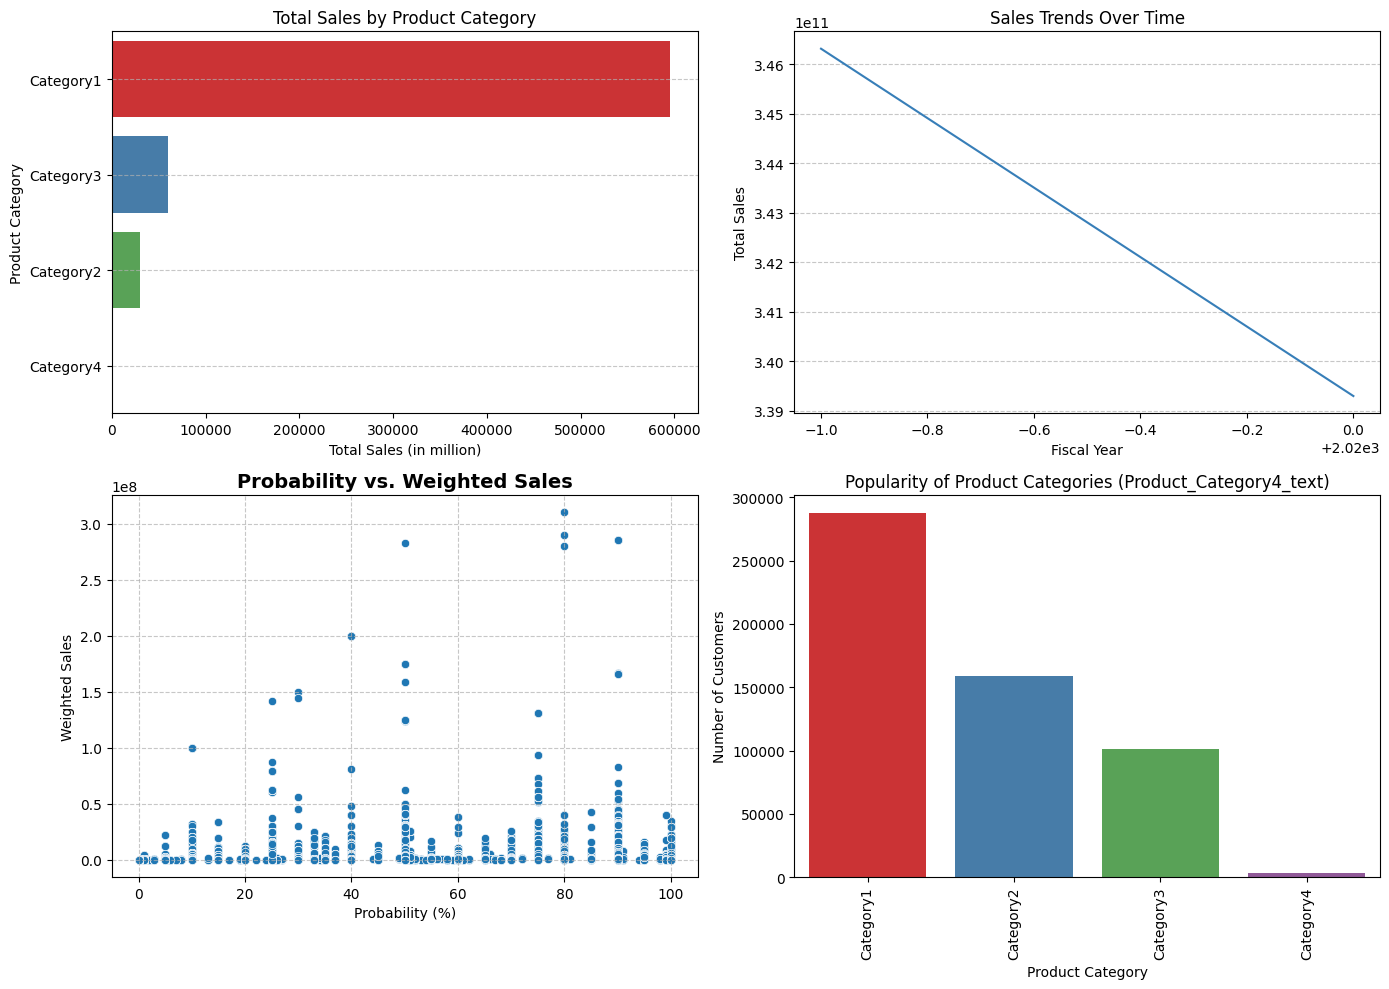

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns



# Group by Product Category, summing sales values
product_sales = customer_op.groupby('Product_Category4_text')[['Total_Sales', 'WEIGHTED_Sales']].sum()
product_sales.sort_values(by='Total_Sales', ascending=False, inplace=True)
product_sales['Total_Sales in million'] = product_sales['Total_Sales'] / 1e6
top_1000_products = product_sales.nlargest(1000, 'Total_Sales')

# Set a custom color palette for the plots
custom_palette = sns.color_palette("Set1")

# Create subplots with axes [0,0] to display graphs next to each other
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Create a bar chart for Total Sales by Product Category with rotated text
sns.barplot(x=top_1000_products['Total_Sales in million'], y=top_1000_products.index, palette=custom_palette, ax=axes[0, 0])
axes[0, 0].set_title('Total Sales by Product Category')
axes[0, 0].set_xlabel('Total Sales (in million)')
axes[0, 0].set_ylabel('Product Category')
axes[0, 0].tick_params(axis='y', labelrotation=0)  # Rotate the y-axis labels
axes[0, 0].grid(True, axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid

# Create a line chart for Sales Trends Over Time
sales_over_time = customer_op.groupby('SNAPSHOT_FISCAL_YEAR')['Total_Sales'].sum()
sales_over_time.plot(kind='line', ax=axes[0, 1], color=custom_palette[1])
axes[0, 1].set_title('Sales Trends Over Time')
axes[0, 1].set_xlabel('Fiscal Year')
axes[0, 1].set_ylabel('Total Sales')
axes[0, 1].grid(True, axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid

# Create a scatter plot of Probability vs. Weighted Sales
sns.scatterplot(x='PROBABILITY_PRC', y='WEIGHTED_Sales', data=customer_op, palette=custom_palette, ax=axes[1, 0])
axes[1, 0].set_title('Probability vs. Weighted Sales')
axes[1, 0].set_xlabel('Probability (%)')
axes[1, 0].set_ylabel('Weighted Sales')
axes[1, 0].grid(True, linestyle='--', alpha=0.7)  # Add grids
axes[1, 0].set_title('Probability vs. Weighted Sales', fontsize=14, fontweight='bold')  # Enhance the title

# Create a bar plot for the popularity of Product Categories4

# Group the data by 'Product_Category4_text' and count the occurrences for each category
category_counts = customer_op['Product_Category4_text'].value_counts()

sns.barplot(x=category_counts.index, y=category_counts.values, ax=axes[1, 1], palette=custom_palette)
axes[1, 1].set_title('Popularity of Product Categories (Product_Category4_text)')
axes[1, 1].set_xlabel('Product Category')
axes[1, 1].set_ylabel('Number of Customers')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Ensure a clean layout
plt.show()




# **GRAPH- A2.1**

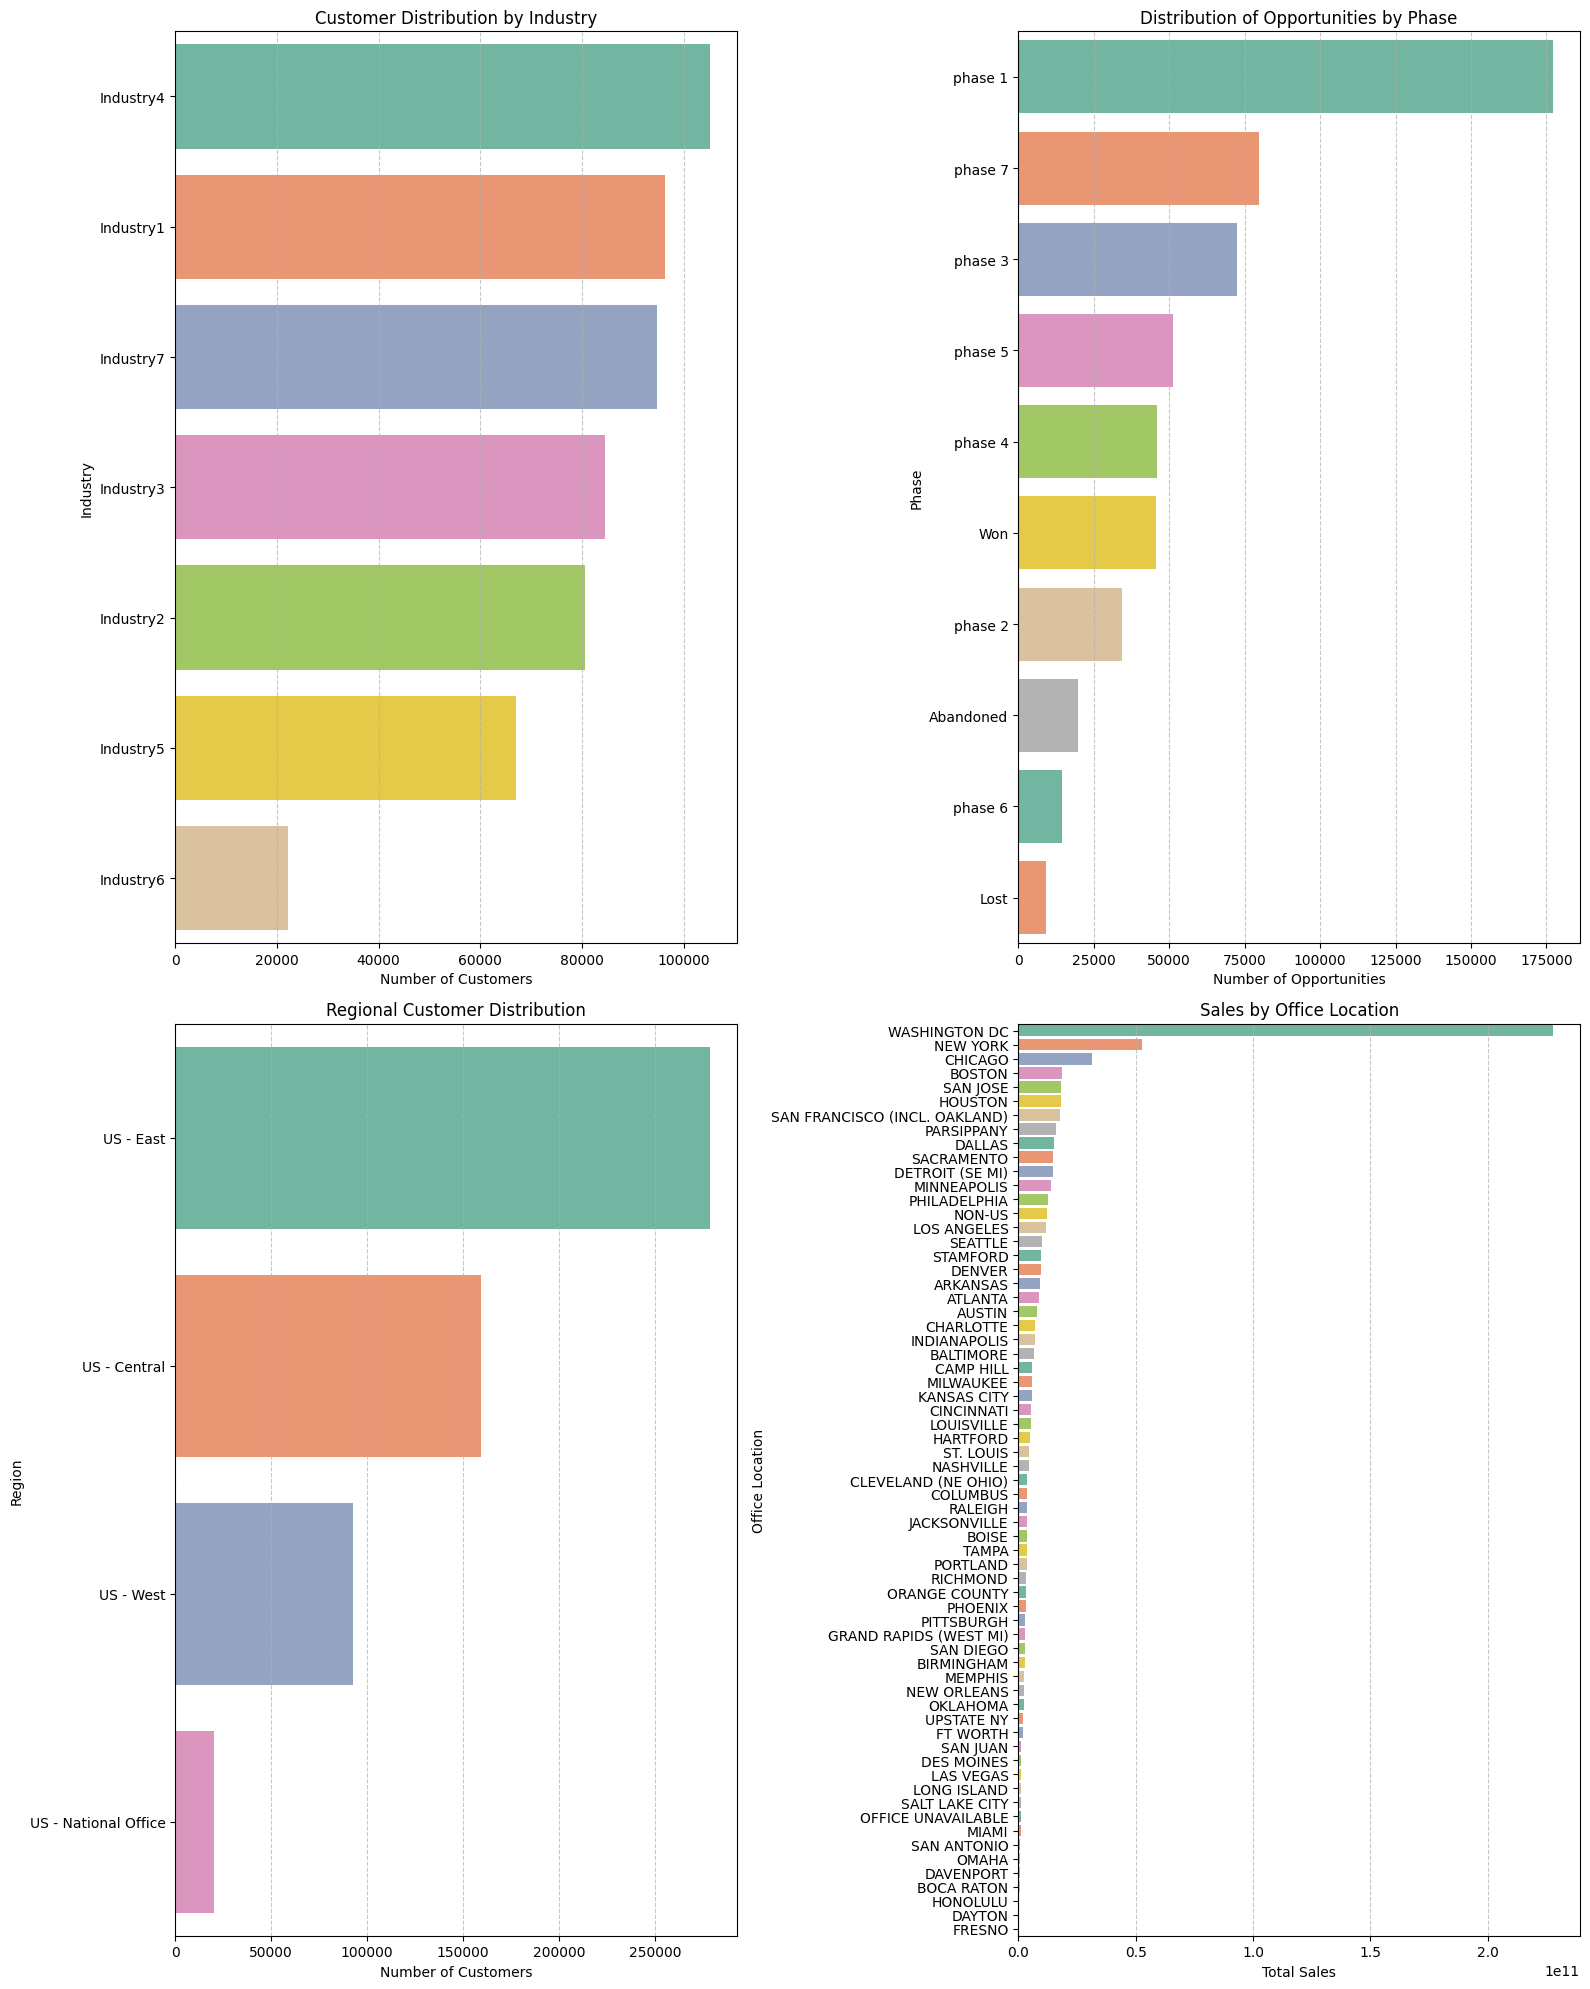

In [43]:

# Define a mapping to remove duplicates
duplicate_mapping = {
    'INDUSTRY1': 'Industry1',
    'INDUSTRY2': 'Industry2',
    'INDUSTRY3': 'Industry3',
    'INDUSTRY4': 'Industry4',
    'INDUSTRY5': 'Industry5',
    'INDUSTRY6': 'Industry6',
    'INDUSTRY7': 'Industry7'
}

# Replace the values using the mapping
customer_op['customer_INDUSTRY_DESC'] = customer_op['customer_INDUSTRY_DESC'].replace(duplicate_mapping)

data = customer_op

# Set a custom color palette for the plots
custom_palette = sns.color_palette("Set2")

# Create subplots with axes [0,0] to display graphs next to each other
fig, axes = plt.subplots(2, 2, figsize=(16, 20))

# Customer Distribution by Industry
industry_counts = data['customer_INDUSTRY_DESC'].value_counts()
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette=custom_palette, ax=axes[0, 0])
axes[0, 0].set_title('Customer Distribution by Industry')
axes[0, 0].set_xlabel('Number of Customers')
axes[0, 0].set_ylabel('Industry')
axes[0, 0].grid(True, axis='x', linestyle='--', alpha=0.7)  # Add a horizontal grid

# Distribution of Opportunities by Phase
phase_counts = data['PHASE_NAME'].value_counts()
sns.barplot(x=phase_counts.values, y=phase_counts.index, palette=custom_palette, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Opportunities by Phase')
axes[0, 1].set_xlabel('Number of Opportunities')
axes[0, 1].set_ylabel('Phase')
axes[0, 1].grid(True, axis='x', linestyle='--', alpha=0.7)  # Add a horizontal grid

# Regional Customer Distribution
region_counts = data['customer_REGION_DESC'].value_counts()
sns.barplot(x=region_counts.values, y=region_counts.index, palette=custom_palette, ax=axes[1, 0])
axes[1, 0].set_title('Regional Customer Distribution')
axes[1, 0].set_xlabel('Number of Customers')
axes[1, 0].set_ylabel('Region')
axes[1, 0].grid(True, axis='x', linestyle='--', alpha=0.7)  # Add a horizontal grid

# Sales by Office Location
office_sales = data.groupby('customer_OFFICE_DESC')['Total_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=office_sales.values, y=office_sales.index, palette=custom_palette, ax=axes[1, 1])
axes[1, 1].set_title('Sales by Office Location')
axes[1, 1].set_xlabel('Total Sales')
axes[1, 1].set_ylabel('Office Location')
axes[1, 1].grid(True, axis='x', linestyle='--', alpha=0.7)  # Add a horizontal grid

plt.tight_layout()  # Ensure a clean layout
plt.show()


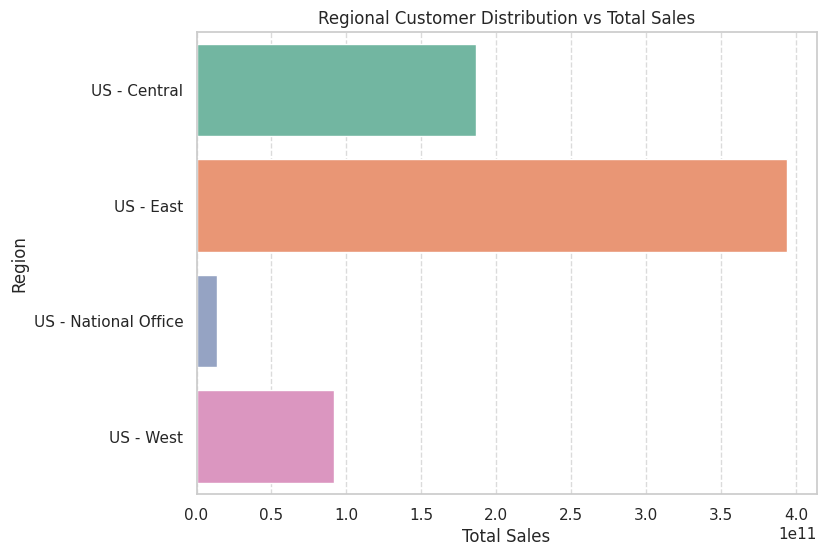

In [100]:


# Assuming df is your DataFrame
custom_palette = "Set2"  # Define your custom color palette if needed

# Group by 'Region' and calculate total sales for each region
region_sales = data.groupby('customer_REGION_DESC')['Total_Sales'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Total_Sales', y='customer_REGION_DESC', data=region_sales, palette=custom_palette)
plt.title('Regional Customer Distribution vs Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


# **A2.2**

Box plots will provide insights into the distribution of data, the presence of outliers, and the overall variability in Total Sales by Product Category, Sales Trends Over Time, Probability, and Weighted Sales.

In [44]:
data['SNAPSHOT_FISCAL_YEAR_PERIOD_y'] = data['SNAPSHOT_FISCAL_YEAR_PERIOD_y'].astype(str).str.split('.').str[0]

# Extract the fiscal year and period
data['Fiscal_Year'] = data['SNAPSHOT_FISCAL_YEAR_PERIOD_y'].str[:4]
data['Period'] = data['SNAPSHOT_FISCAL_YEAR_PERIOD_y'].str[4:]

# Handle missing values
data['Fiscal_Year'] = pd.to_numeric(data['Fiscal_Year'], errors='coerce')  # Coerce non-numeric values to NaN
data['Fiscal_Period'] = pd.to_numeric(data['Period'], errors='coerce')  # Coerce non-numeric values to NaN

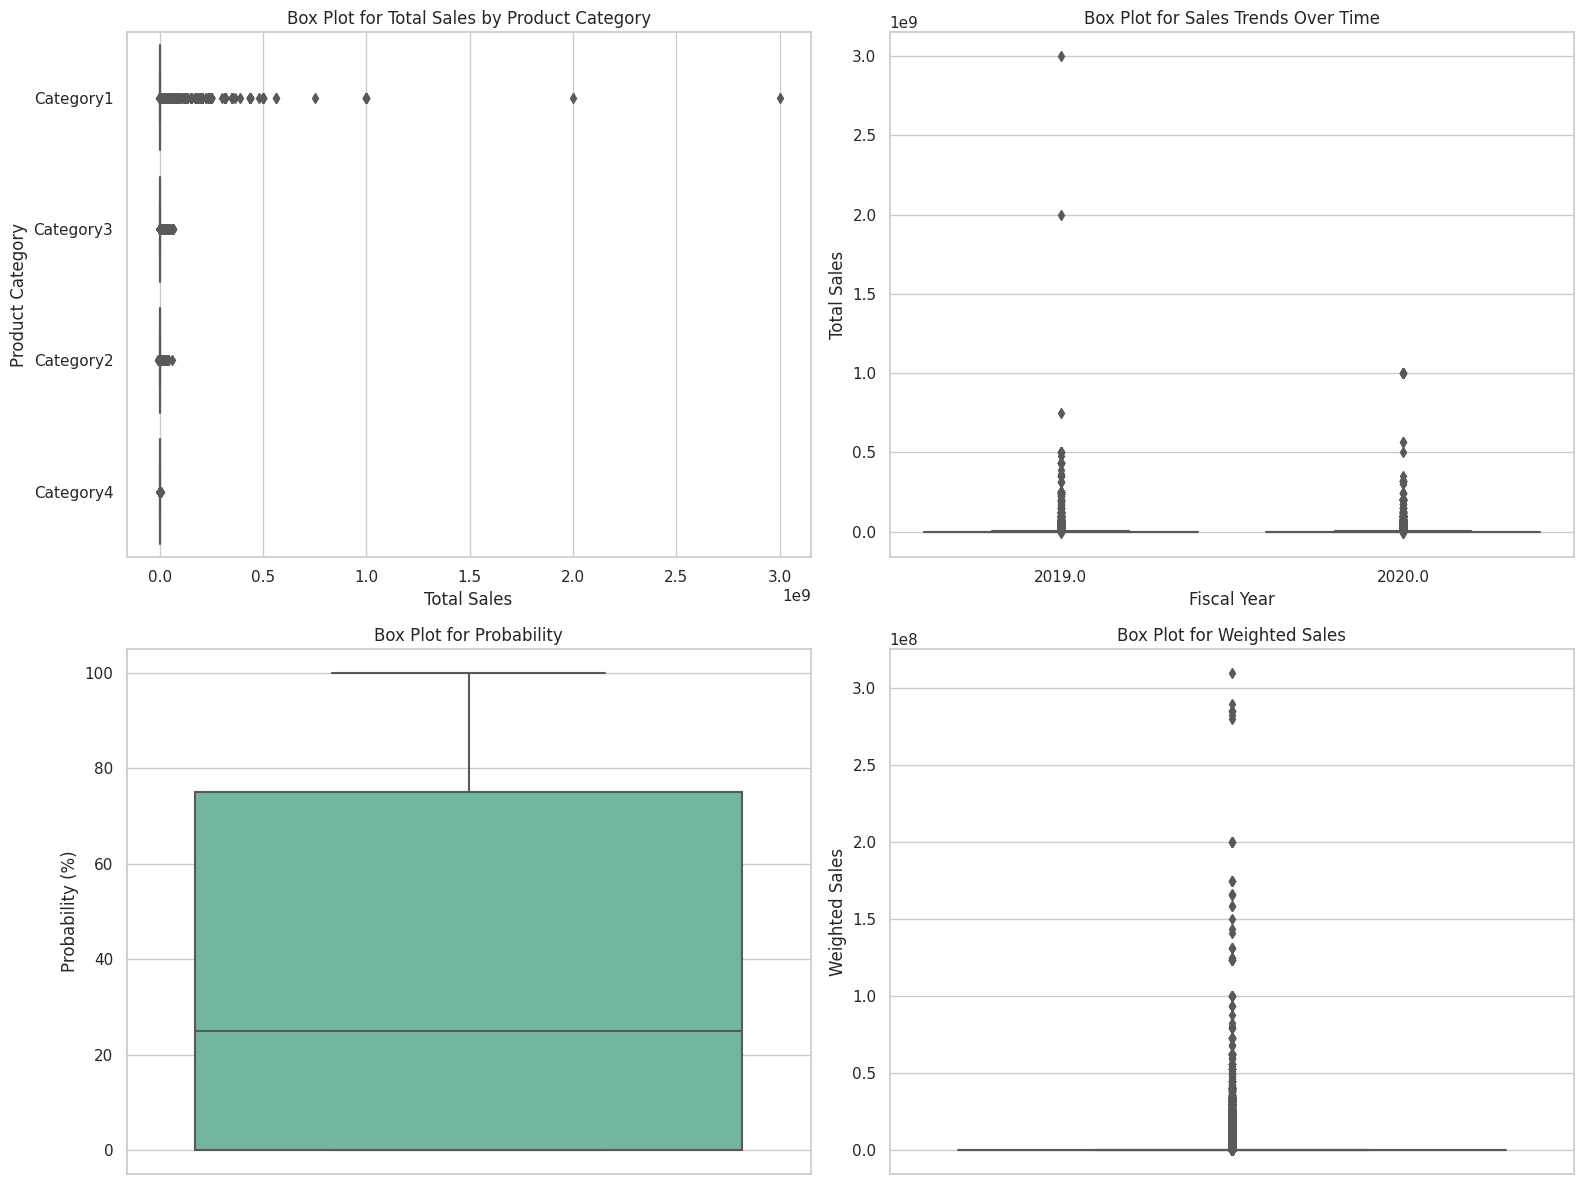

In [45]:


# Set the style of the plots
sns.set(style="whitegrid")

# Create subplots to display box plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Box Plot for Total Sales by Product Category
sns.boxplot(x='Total_Sales', y='Product_Category4_text', data=data, ax=axes[0, 0], palette="Set2")
axes[0, 0].set_title('Box Plot for Total Sales by Product Category')
axes[0, 0].set_xlabel('Total Sales')
axes[0, 0].set_ylabel('Product Category')

# Box Plot for Sales Trends Over Time
sns.boxplot(x='SNAPSHOT_FISCAL_YEAR', y='Total_Sales', data=data, ax=axes[0, 1], palette="Set2")
axes[0, 1].set_title('Box Plot for Sales Trends Over Time')
axes[0, 1].set_xlabel('Fiscal Year')
axes[0, 1].set_ylabel('Total Sales')

# Box Plot for Probability
sns.boxplot(y='PROBABILITY_PRC', data=data, ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title('Box Plot for Probability')
axes[1, 0].set_ylabel('Probability (%)')

# Box Plot for Weighted Sales
sns.boxplot(y='WEIGHTED_Sales', data=data, ax=axes[1, 1], palette="Set2")
axes[1, 1].set_title('Box Plot for Weighted Sales')
axes[1, 1].set_ylabel('Weighted Sales')

plt.tight_layout()  # Ensure a clean layout
plt.show()


# CHI SQUARE

In [46]:

from sklearn.preprocessing import LabelEncoder


# Preprocess the data by encoding 'Product_Category4' and 'PHASE_NAME'
label_encoder = LabelEncoder()
# data['Product_Category4_encoded'] = label_encoder.fit_transform(data['Product_Category4_text'])


In [47]:
from sklearn.preprocessing import LabelEncoder

# Encode  'Product_Category2_text'
data['PHASE_NAME_encoded'] = label_encoder.fit_transform(data['PHASE_NAME'])

data['Product_Category_Label'] = LabelEncoder().fit_transform(data['Product_Category2_text'])


In [48]:

# Create a contingency table
contingency_table = pd.crosstab(data['PHASE_NAME_encoded'], data['Product_Category_Label'])

# Calculate the chi-squared statistic to test for independence
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(contingency_table)


In [49]:
print("chi square :{}, P value: {}".format(chi2,p))

chi square :114457.95463299542, P value: 0.0


Given these results, it indicates that there is a highly significant association between the product categories and the phases. The small p-value suggests that the relationship is not due to random chance but is, in fact, a strong and meaningful association.

In practical terms, this means that certain product categories are significantly more likely to be associated with specific phases, and we should focus on the product categories that have a high likelihood of leading to certain phases for a future sales efforts

In [50]:

# Initialize LabelEncoder for 'Product_Category2_text'
product_category_encoder = LabelEncoder()
product_category_encoder.fit(data['Product_Category2_text'])

# Initialize LabelEncoder for 'phase_name'
phase_encoder = LabelEncoder()
phase_encoder.fit(data['PHASE_NAME'])

# Get the total counts for each phase
phase_total_counts = contingency_table.sum(axis=1)

# Find the product category with the highest count for each phase
phase_labels = data['PHASE_NAME_encoded'].unique()
for phase_label in phase_labels:
    phase_name = phase_encoder.classes_[phase_label]
    category_counts = contingency_table.loc[phase_label]

    # Calculate the percentages
    category_percentages = (category_counts / phase_total_counts[phase_label]) * 100

    print(f"Phase: {phase_name}")
    for category_label, category_count, category_percentage in zip(category_counts.index, category_counts, category_percentages):
        category_name = product_category_encoder.classes_[category_label]
        print(f"  Product Category: {category_name}, Count: {category_count}, Percentage: {category_percentage:.2f}%")



Phase: Abandoned
  Product Category: category1, Count: 0, Percentage: 0.00%
  Product Category: category10, Count: 0, Percentage: 0.00%
  Product Category: category12, Count: 4, Percentage: 0.02%
  Product Category: category13, Count: 1, Percentage: 0.01%
  Product Category: category14, Count: 436, Percentage: 2.19%
  Product Category: category15, Count: 2, Percentage: 0.01%
  Product Category: category16, Count: 0, Percentage: 0.00%
  Product Category: category17, Count: 123, Percentage: 0.62%
  Product Category: category18, Count: 1884, Percentage: 9.47%
  Product Category: category19, Count: 91, Percentage: 0.46%
  Product Category: category2, Count: 23, Percentage: 0.12%
  Product Category: category20, Count: 150, Percentage: 0.75%
  Product Category: category21, Count: 1636, Percentage: 8.23%
  Product Category: category22, Count: 297, Percentage: 1.49%
  Product Category: category23, Count: 0, Percentage: 0.00%
  Product Category: category24, Count: 4, Percentage: 0.02%
  Product

# **GRAPH- A3.1**

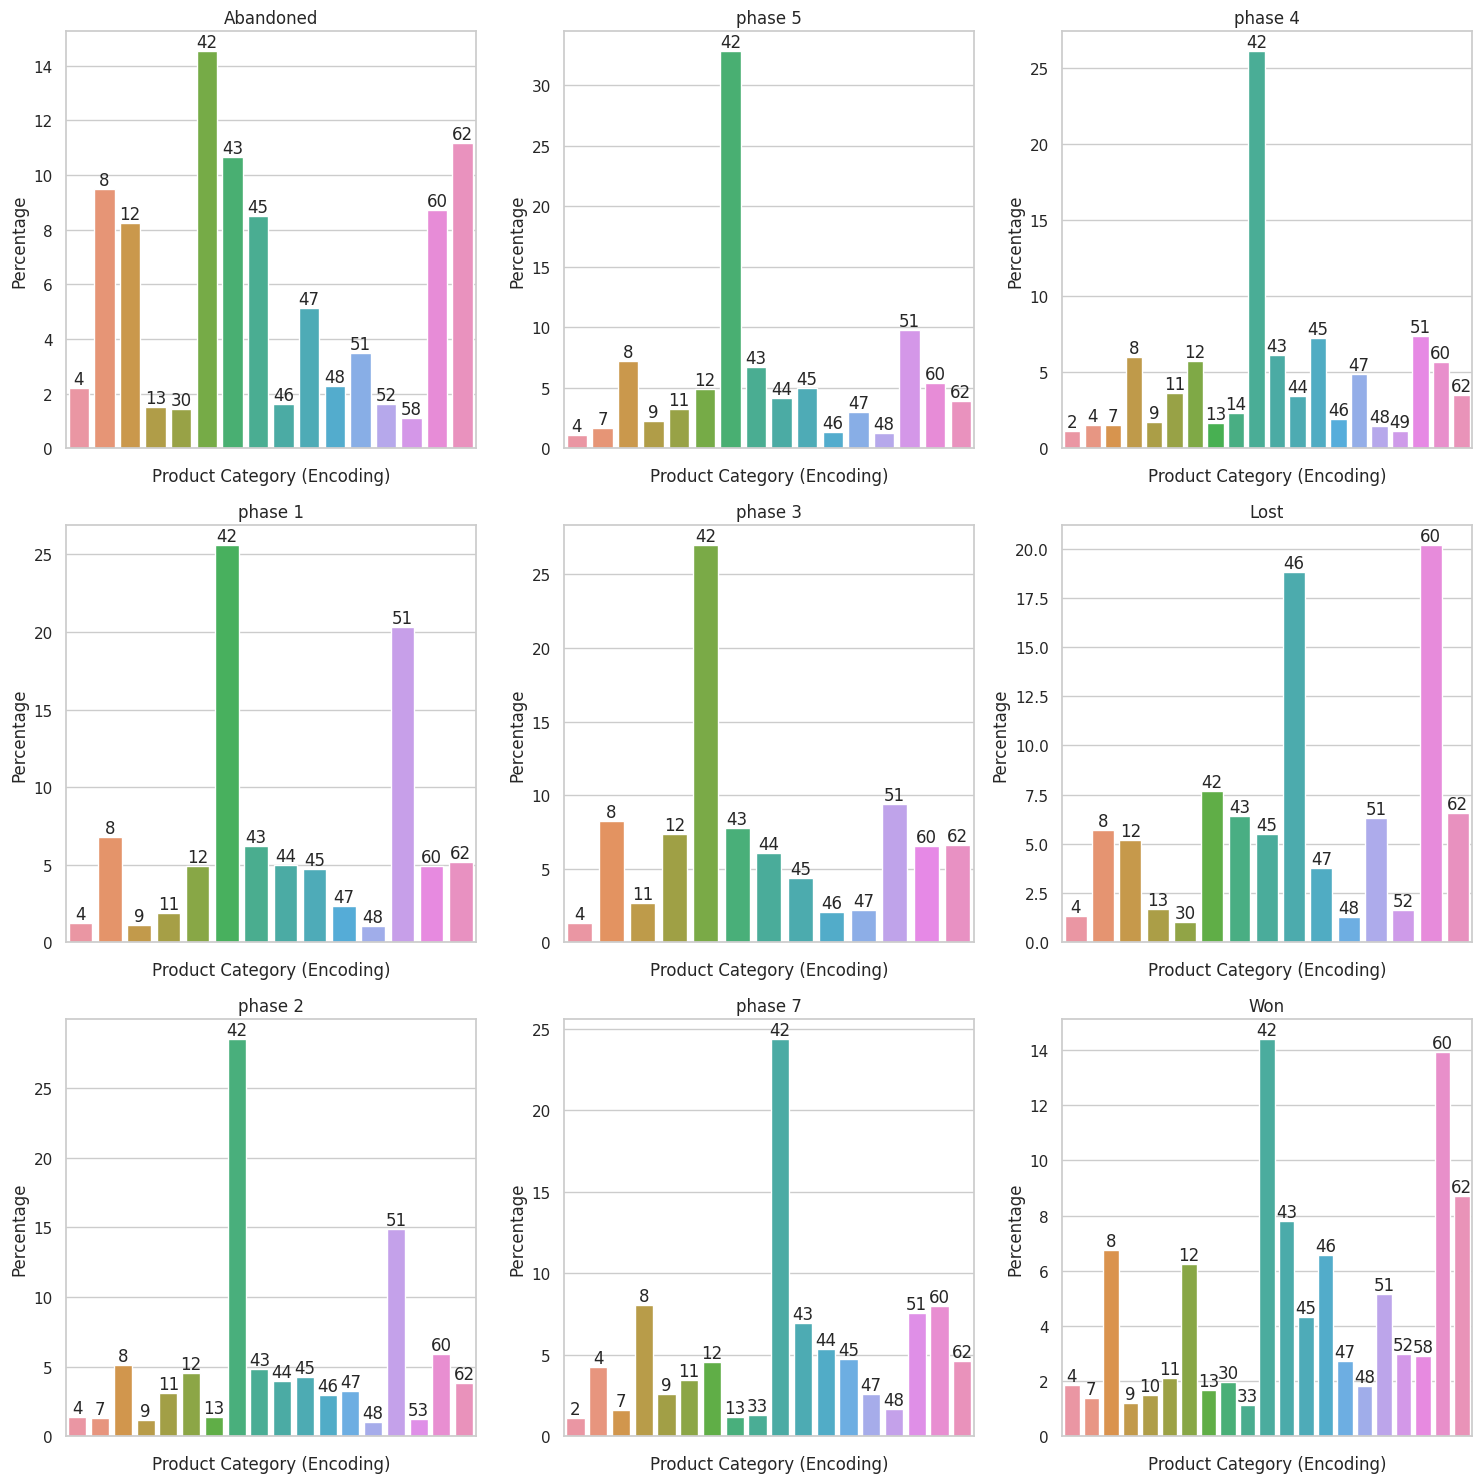

,Encoding,Category Name
0,0,category1
1,1,category10
2,2,category12
3,3,category13
4,4,category14
...,...,...
59,59,category67
60,60,category68
61,61,category7
62,62,category8


In [51]:


# Initialize LabelEncoder for 'Product_Category2_text'
product_category_encoder = LabelEncoder()
product_category_encoder.fit(data['Product_Category2_text'])
product_category_names = product_category_encoder.classes_

# Initialize LabelEncoder for 'phase_name'
phase_encoder = LabelEncoder()
phase_encoder.fit(data['PHASE_NAME'])
phase_names = phase_encoder.classes_

# Get the total counts for each phase
phase_total_counts = contingency_table.sum(axis=1)

# Define a threshold percentage (e.g., 1%) for filtering out low-percentage categories
threshold_percentage = 1

# Create a list to store filtered categories
filtered_categories = []

# Define the number of rows and columns in the grid
num_rows = 3
num_columns = 3

# Calculate the total number of phases
num_phases = len(data['PHASE_NAME_encoded'].unique())

# Calculate the number of subplots needed
num_subplots = min(num_phases, num_rows * num_columns)

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

# Create a DataFrame to store the encoding vs category name
encoding_vs_category = pd.DataFrame({'Encoding': range(len(product_category_names)), 'Category Name': product_category_names})

# Flatten the axes to make it easier to iterate
axes = axes.ravel()

for i, ax in enumerate(axes):
    if i < num_subplots:
        phase_label = data['PHASE_NAME_encoded'].unique()[i]
        phase_name = phase_names[phase_label]
        category_counts = contingency_table.loc[phase_label]

        # Calculate the percentages
        category_percentages = (category_counts / phase_total_counts[phase_label]) * 100

        # Filter out categories with percentages below the threshold
        high_percentage_categories = category_percentages[category_percentages >= threshold_percentage]

        # Create a bar plot based on count or percentage
        sns.barplot(x=high_percentage_categories.index, y=high_percentage_categories.values, ax=ax)
        ax.set_title(phase_name)
        ax.set_xlabel('Product Category (Encoding)')
        ax.set_ylabel('Percentage')
        ax.set_xticklabels([])  # Remove x-axis labels

        # Add text labels for the categories
        for bar, category in zip(ax.patches, high_percentage_categories.index):
            ax.annotate(category, (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom')

        # Store the filtered categories for further analysis
        filtered_categories.extend(high_percentage_categories.index)

# Remove empty subplots
for i in range(num_subplots, num_rows * num_columns):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Display the filtered categories
# print(filtered_categories)

# Display the encoding vs category name DataFrame
encoding_vs_category


# **A3.2**

Top product categories to focus on:


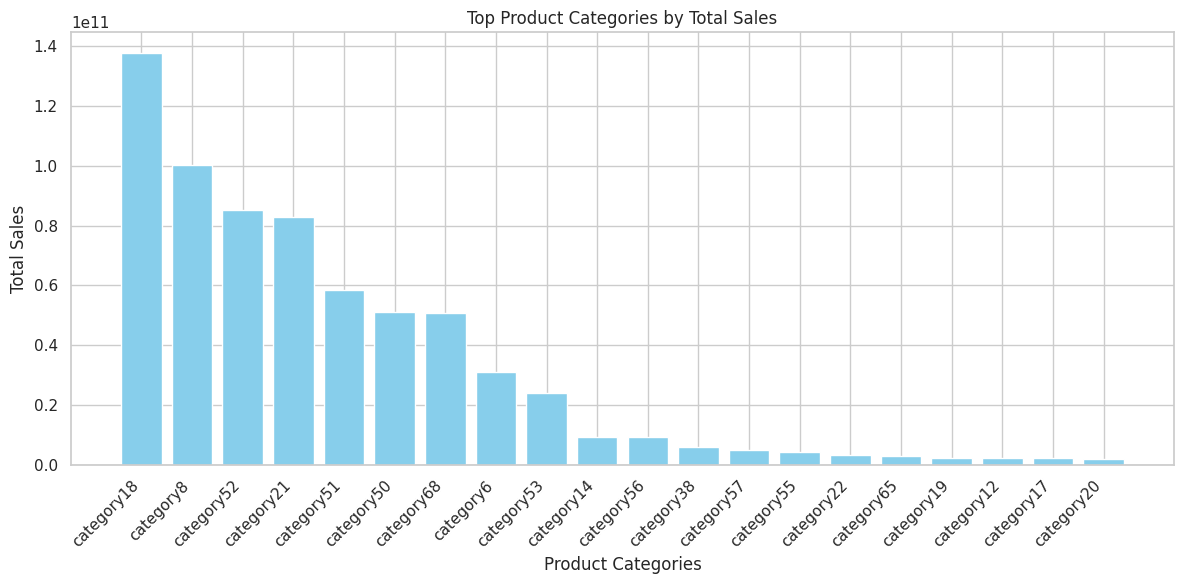

In [52]:
# Grouping the data by Product Category and calculating total sales
product_sales = data.groupby('Product_Category2_text')['Total_Sales'].sum()

# Sorting the product categories based on total sales in descending order
sorted_product_sales = product_sales.sort_values(ascending=False)

# Displaying the top product categories to focus on
print("Top product categories to focus on:")
# Selecting the top 20 product categories to visualize
top_categories = 20
top_product_categories = sorted_product_sales.head(top_categories)

# Creating a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_product_categories.index, top_product_categories.values, color='skyblue')
plt.xlabel('Product Categories')
plt.ylabel('Total Sales')
plt.title('Top Product Categories by Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

# **CORRELATION HEATMAP**

<ipython-input-53-c6aee6abe713>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


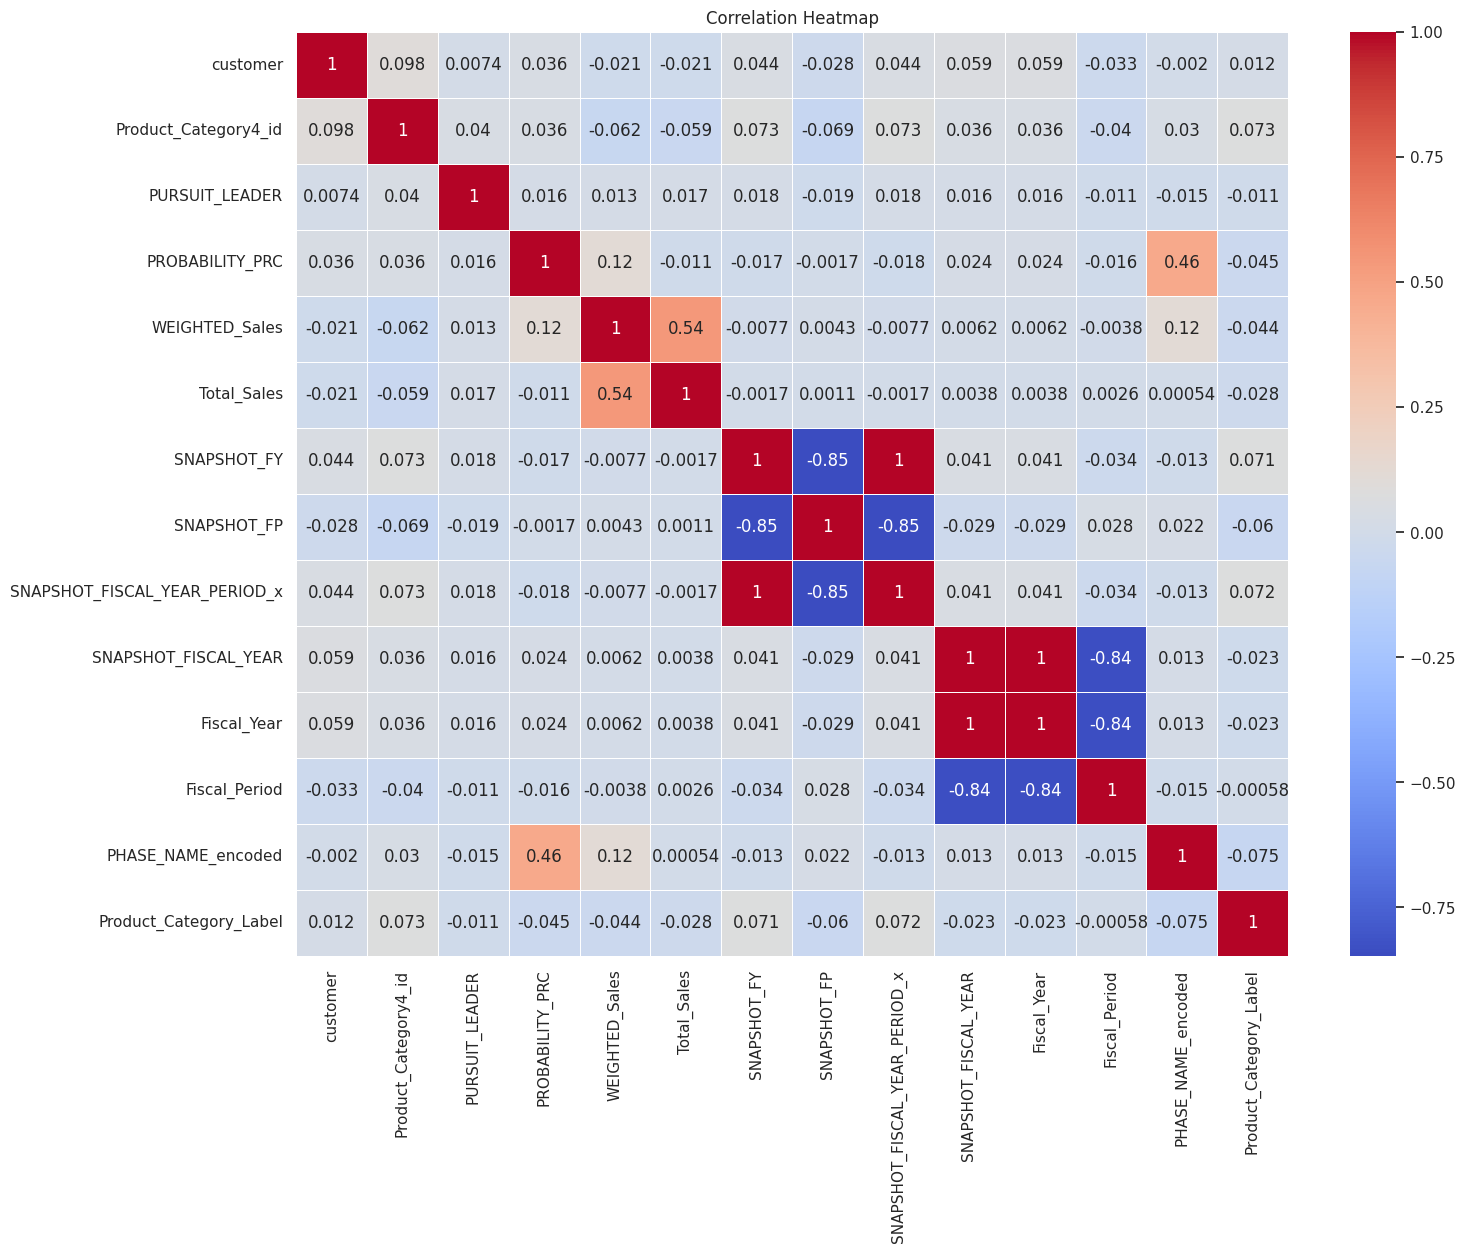

In [53]:

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

# Add a title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()


# K-MEAN CLUSTERING <BR>

Get important Features

FEATURE SELECTION

In [54]:
columns_section= ['customer','customer_TEXT','customer_INDUSTRY_DESC', 'customer_OFFICE_DESC','PHASE_NAME','OPPORTUNITY_OPEN_CLOSED_INDICATOR',
 'Product_Category4_id','Product_Category4_text', 'Product_Category2_text','Product_Category3_text',
  'PROBABILITY_PRC', 'WEIGHTED_Sales', 'Total_Sales','STRATEGIC_OPPORTUNITY',
  'customer_REGION_DESC','customer_SECTOR_DESC', 'customer_SIC_TEXT',
 'PURSUIT_START_DATE','PROJECT_START_DATE', 'PROJECT_END_DATE', 'PERIOD_WON_LOSS_ABANDONED','DATE_WON_LOSS_ABANDONED',
 'Fiscal_Year', 'Fiscal_Period','SNAPSHOT_FY', 'SNAPSHOT_FP','PHASE_NAME_encoded','Product_Category_Label',
 ]


data = data[columns_section]
# data.to_csv('/content/gdrive/MyDrive/Case_Study_Data/collection.csv')

# **GRAPH-4.1**

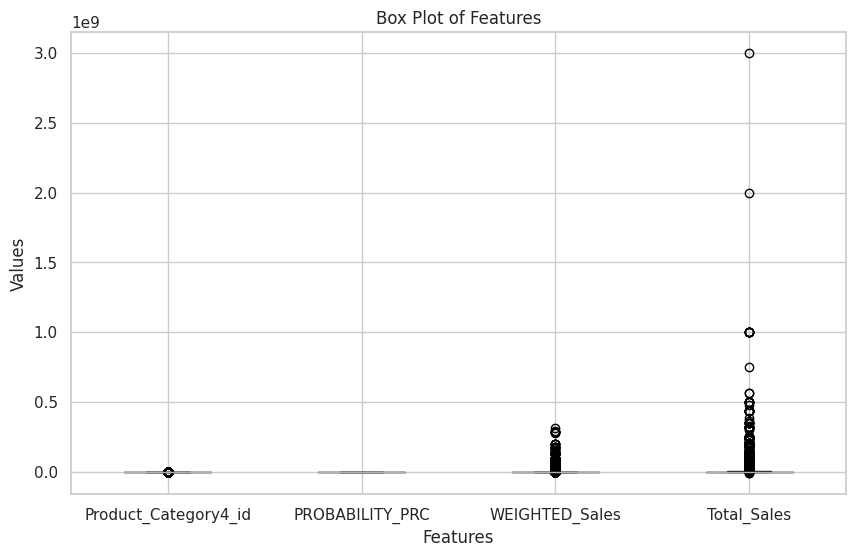

In [55]:

# Select relevant features for box plot
features = data[['Product_Category4_id', 'PROBABILITY_PRC', 'WEIGHTED_Sales', 'Total_Sales']]

# Create a box plot
plt.figure(figsize=(10, 6))
features.boxplot()
plt.title('Box Plot of Features')
plt.ylabel('Values')
plt.xlabel('Features')
plt.xticks(range(1, len(features.columns) + 1), features.columns)
plt.show()


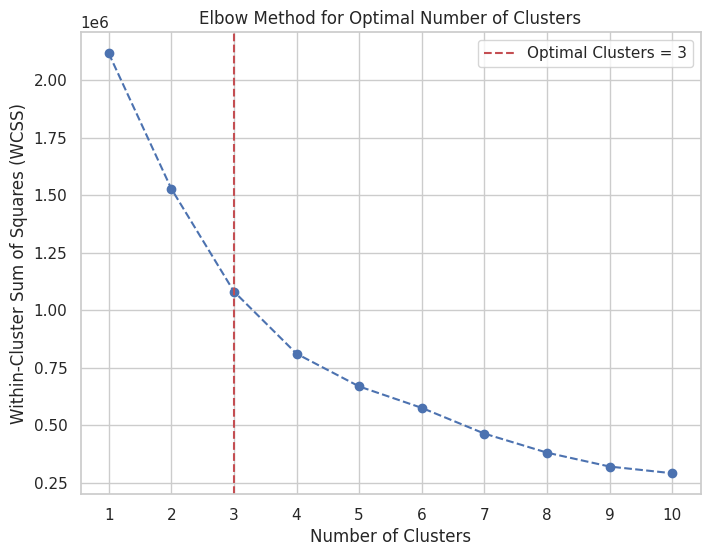

Cluster Centers:
   Product_Category4_id  PROBABILITY_PRC  WEIGHTED_Sales   Total_Sales
0           3683.026579        10.135188    5.116102e+04  5.671909e+05
1           3327.689274        85.501439    2.628497e+05  4.617846e+05
2           2211.173192        47.720215    2.641306e+06  8.291744e+06
Products to Focus On:
[ 2001.  1638.  5844.  1785.  1728.  2004.   672.  5874.  2823.  3576.
  5853.  1686.  1650.  1821.  2370. 15321.  1797.  3480.  1818.  1836.
  1869.  1794.  1725.  1791.  1644.  1824.  4146.  1809.   711.  1866.
  1860.  2010.  1752.  1995.  2103.  1647.  1749.  1764.  1653.  1767.
  1833.  1629.  1734.  1338.  1779.  1671.  1884.  2013.  1635.  1125.
  2061.  1896.  1122.  1632.  1911.  1665.  5850.   870.  2214.  1842.
  1917.  1935.  1803.  3738.  3729.  1953.  1710.  6078.  3222.  1101.
  3300.  1875.  1878.  1683.  2052.  2895.  2070.  6057.  1770.  1743.
 13023.   606.  1002.  1872.  2079.  1713.  3714.  1302.  1845.   882.
  1272.  3819.   453.  1746.  3789.  2

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Select relevant features for clustering
features = data[['Product_Category4_id', 'PROBABILITY_PRC', 'WEIGHTED_Sales', 'Total_Sales']]

# Use Z-score to handle outliers
z_scores = stats.zscore(features)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)  # Keep only rows where all features are within 3 standard deviations
filtered_data = data[filtered_entries].copy()  # Create a copy of the filtered data

# Standardize the features
scaler = StandardScaler()
standardized_features = scaler.fit_transform(filtered_data[['Product_Category4_id', 'PROBABILITY_PRC', 'WEIGHTED_Sales', 'Total_Sales']])

# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(standardized_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)

# Identify the optimal number of clusters based on the elbow method
optimal_num_clusters = 3
plt.axvline(x=optimal_num_clusters, color='r', linestyle='--', label=f'Optimal Clusters = {optimal_num_clusters}')
plt.legend()

plt.show()

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters,n_init=10, random_state=42)
filtered_data['Cluster'] = kmeans.fit_predict(standardized_features)

# Restoring the original data with cluster labels
data_with_clusters = data.merge(filtered_data[['Cluster']], left_index=True, right_index=True, how='left')

# Analyze the clusters
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns)
print("Cluster Centers:")
print(cluster_centers)

# Identify products in the cluster with the highest sales
cluster_with_highest_sales = cluster_centers['Total_Sales'].idxmax()
recommended_products = data_with_clusters[data_with_clusters['Cluster'] == cluster_with_highest_sales]['Product_Category4_id'].unique()

print("Products to Focus On:")
print(recommended_products)


Calinski-Harabasz score of approximately 253,536.74. This high score suggests that the clustering performed has resulted in well-separated and distinct clusters. It implies that the data points within each cluster are close to each other, and the clusters themselves are far apart in the feature space.<br>
<hr>
<br>

# **A4**
Let find the Product Categories of the selected Product_Category4_id

In [57]:
# Create a DataFrame with the selected Product_Category4_id
selected_products_df = data[['Product_Category4_id','Product_Category4_text', 'Product_Category2_text', 'Product_Category3_text','Total_Sales']]
selected_products_df = selected_products_df[selected_products_df['Product_Category4_id'].isin(recommended_products)]
selected_products_df= selected_products_df.drop_duplicates().reset_index().drop(columns='index').sort_values('Total_Sales', ascending= False)
# Display the resulting DataFrame
selected_products_df

,Product_Category4_id,Product_Category4_text,Product_Category2_text,Product_Category3_text,Total_Sales
46786,2823.0,Category1,category52,sub category180,3000000000
43035,2823.0,Category1,category52,sub category180,2000000000
45051,1803.0,Category1,category52,sub category164,1000000000
45050,2001.0,Category1,category51,sub category152,1000000000
1027,2823.0,Category1,category55,sub category180,750000000
...,...,...,...,...,...
30602,1917.0,Category1,category68,sub category120,-19800
26671,2823.0,Category1,category61,sub category126,-195000
104,1743.0,Category1,category21,sub category60,-5230000
34456,5850.0,Category2,category50,sub category180,-7000000


# **SECTION B**

In [58]:
col1=['OPPORTUNITY_OPEN_CLOSED_INDICATOR', 'PHASE_NAME', 'PURSUIT_START_DATE',
       'PROJECT_START_DATE', 'PROJECT_END_DATE', 'PERIOD_WON_LOSS_ABANDONED',
       'DATE_WON_LOSS_ABANDONED', 'PRIORITY', 'customer',
       'PURSUIT_LEADER', 'BUYER_ROLE_DESC','CURRENCY', 'PROBABILITY_PRC',
       'WEIGHTED_Sales', 'Total_Sales',
       'STRATEGIC_OPPORTUNITY', 'OPPORTUNITY_ID']

col2= ['SNAPSHOT_FISCAL_YEAR', 'SNAPSHOT_FISCAL_YEAR_PERIOD', 'customer',
       'customer_TEXT', 'customer_INDUSTRY_DESC', 'customer_OFFICE_DESC',
       'customer_REGION_DESC', 'customer_SECTOR_DESC', 'customer_SIC_TEXT',
       'customer_SUB_SECTOR_DESC']


df1= base_customer[col2]
df2= customer_opportunity_df[col1]

# Remove duplicates from both dataframes
df2 = df2.drop_duplicates(subset='customer')

# Merge the tables using a left join
df = pd.merge(df1,df2, on='customer', how='left')

# Display the merged DataFrame

df= df.dropna(how='any')
df.count()

SNAPSHOT_FISCAL_YEAR                 96472
SNAPSHOT_FISCAL_YEAR_PERIOD          96472
customer                             96472
customer_TEXT                        96472
customer_INDUSTRY_DESC               96472
customer_OFFICE_DESC                 96472
customer_REGION_DESC                 96472
customer_SECTOR_DESC                 96472
customer_SIC_TEXT                    96472
customer_SUB_SECTOR_DESC             96472
OPPORTUNITY_OPEN_CLOSED_INDICATOR    96472
PHASE_NAME                           96472
PURSUIT_START_DATE                   96472
PROJECT_START_DATE                   96472
PROJECT_END_DATE                     96472
PERIOD_WON_LOSS_ABANDONED            96472
DATE_WON_LOSS_ABANDONED              96472
PRIORITY                             96472
PURSUIT_LEADER                       96472
BUYER_ROLE_DESC                      96472
CURRENCY                             96472
PROBABILITY_PRC                      96472
WEIGHTED_Sales                       96472
Total_Sales

In [59]:
# Define a mapping to remove duplicates
duplicate_mapping = {
    'INDUSTRY1': 'Industry1',
    'INDUSTRY2': 'Industry2',
    'INDUSTRY3': 'Industry3',
    'INDUSTRY4': 'Industry4',
    'INDUSTRY5': 'Industry5',
    'INDUSTRY6': 'Industry6',
    'INDUSTRY7': 'Industry7'
}

# Replace the values using the mapping
df['customer_INDUSTRY_DESC'] = df['customer_INDUSTRY_DESC'].replace(duplicate_mapping)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96472 entries, 0 to 96499
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SNAPSHOT_FISCAL_YEAR               96472 non-null  int64  
 1   SNAPSHOT_FISCAL_YEAR_PERIOD        96472 non-null  int64  
 2   customer                           96472 non-null  float64
 3   customer_TEXT                      96472 non-null  object 
 4   customer_INDUSTRY_DESC             96472 non-null  object 
 5   customer_OFFICE_DESC               96472 non-null  object 
 6   customer_REGION_DESC               96472 non-null  object 
 7   customer_SECTOR_DESC               96472 non-null  object 
 8   customer_SIC_TEXT                  96472 non-null  object 
 9   customer_SUB_SECTOR_DESC           96472 non-null  object 
 10  OPPORTUNITY_OPEN_CLOSED_INDICATOR  96472 non-null  object 
 11  PHASE_NAME                         96472 non-null  obj

In [61]:
df[['STRATEGIC_OPPORTUNITY','customer_SIC_TEXT','PHASE_NAME','customer_SECTOR_DESC']]

,STRATEGIC_OPPORTUNITY,customer_SIC_TEXT,PHASE_NAME,customer_SECTOR_DESC
0,POSITIONING WITH A KEY CLIENT,SIC62,Abandoned,Sector22
1,POSITIONING WITH A KEY CLIENT,SIC983,Lost,Sector21
2,POSITIONING WITH A KEY CLIENT,SIC618,phase 1,Sector4
3,POSITIONING WITH A KEY CLIENT,SIC808,Won,Sector20
4,POSITIONING WITH A KEY CLIENT,SIC905,phase 2,Sector2
...,...,...,...,...
96495,POSITIONING WITH A KEY CLIENT,SIC531,phase 1,Sector11
96496,POSITIONING WITH A KEY CLIENT,SIC903,phase 1,Sector2
96497,POSITIONING WITH A KEY CLIENT,SIC21,phase 3,Sector10
96498,POSITIONING WITH A KEY CLIENT,SIC491,phase 3,Sector11


# **B1.1**

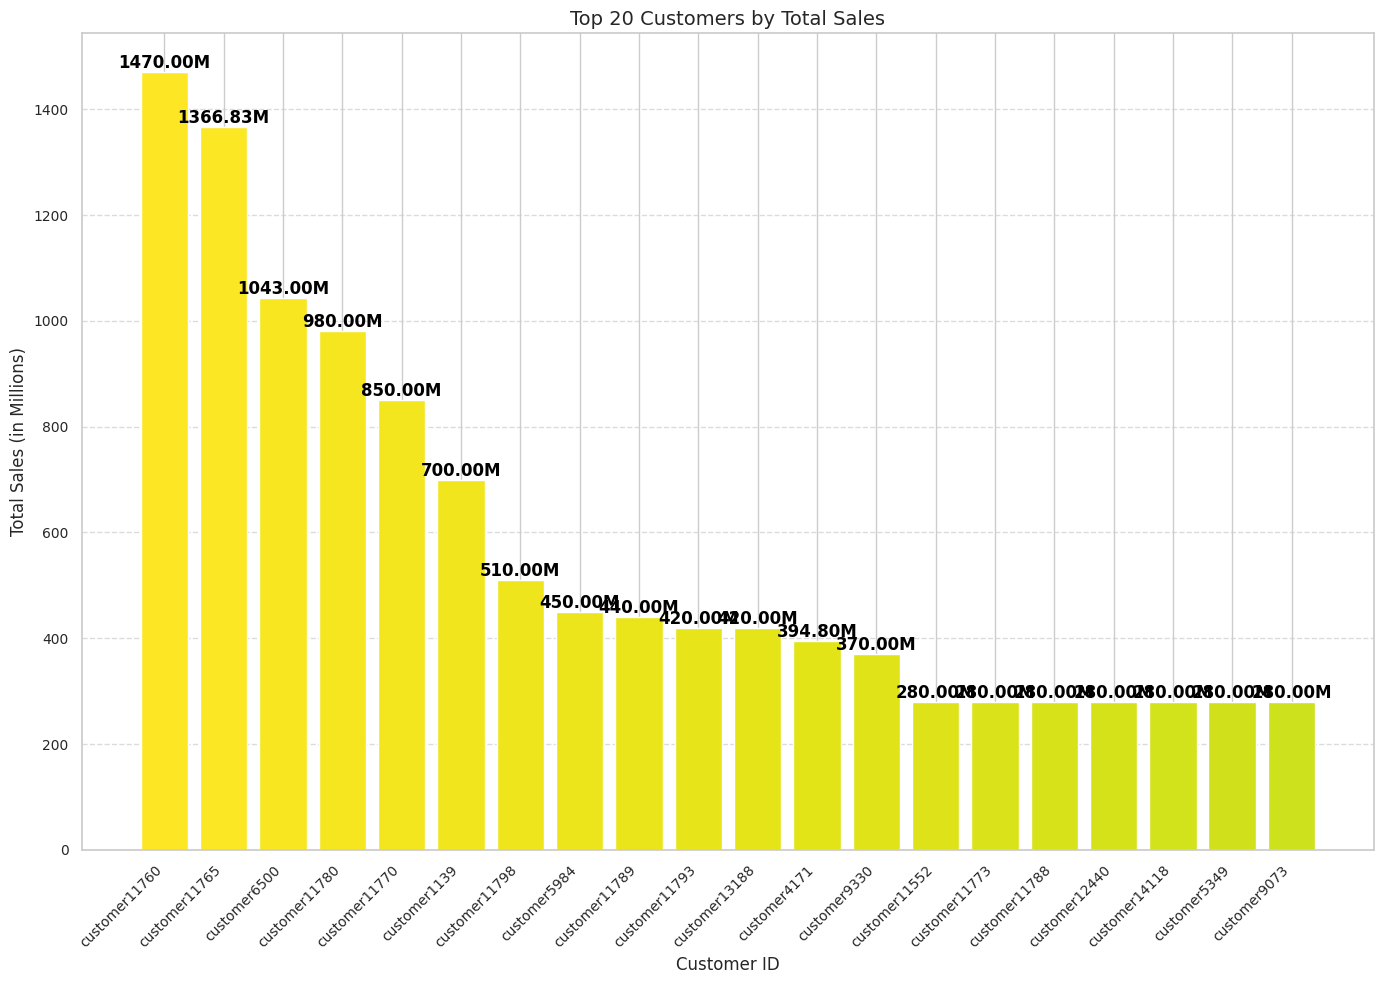

In [62]:
import matplotlib.pyplot as plt

# Calculate total sales for each customer and convert to millions for readability
customer_total_sales = df.groupby('customer_TEXT')['Total_Sales'].sum() / 1_000_000

# Identify top 20 customers based on total sales
top_customers = customer_total_sales.nlargest(20)

# Create a colormap for better distinction between bars
colors = plt.cm.viridis_r(range(len(top_customers)))

# Create the bar chart
plt.figure(figsize=(14, 10))
bars = plt.bar(top_customers.index.astype(str), top_customers.values, color=colors)

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}M', ha='center', va='bottom', color='black', weight='bold')

# Customize labels and title
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Sales (in Millions)', fontsize=12)
plt.title('Top 20 Customers by Total Sales', fontsize=14)

# Customize the appearance of the plot
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optionally save the plot as an image
# plt.savefig('top_customers.png', bbox_inches='tight')

# Display the plot
plt.tight_layout()
plt.show()



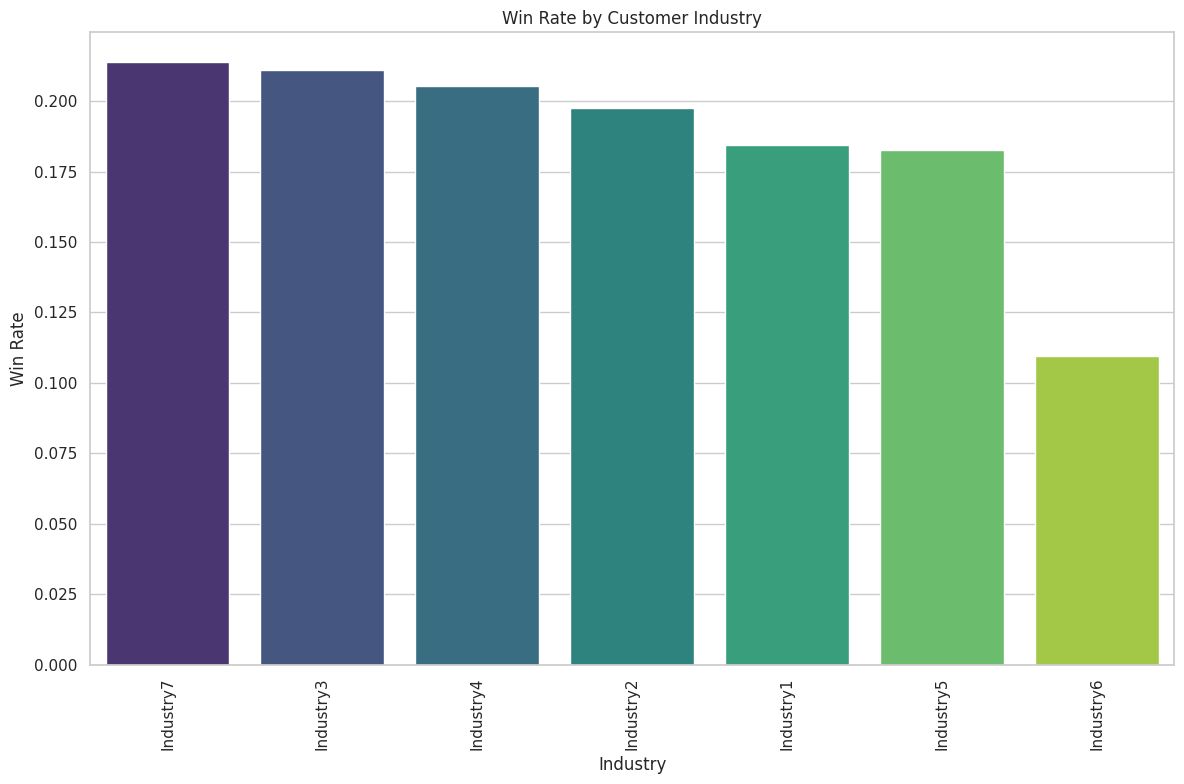

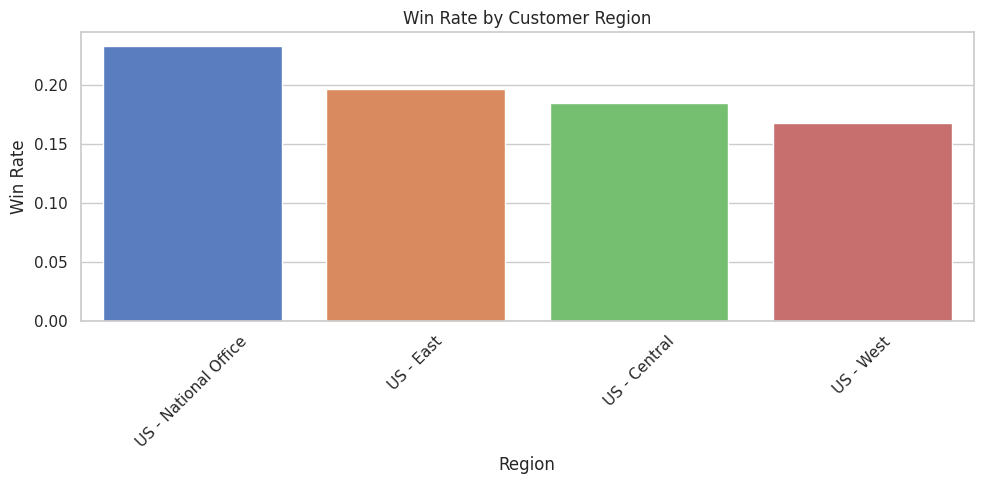

In [63]:

# Filter rows where the opportunity is won (assuming 'WON' is the indicator in 'PHASE_NAME')
won_opportunities = df[df['PHASE_NAME'] == 'Won']

# Calculate win rate by customer industry
win_rate_by_industry = won_opportunities.groupby('customer_INDUSTRY_DESC').size() / df.groupby('customer_INDUSTRY_DESC').size()
win_rate_by_industry = win_rate_by_industry.fillna(0).reset_index(name='Win Rate')

# Sort industries by win rate in descending order
win_rate_by_industry = win_rate_by_industry.sort_values(by='Win Rate', ascending=False)

# Plot win rate by industry
plt.figure(figsize=(12, 8))
sns.barplot(x='customer_INDUSTRY_DESC', y='Win Rate', data=win_rate_by_industry, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Win Rate')
plt.title('Win Rate by Customer Industry')
plt.tight_layout()
plt.show()

# Calculate win rate by customer region
win_rate_by_region = won_opportunities.groupby('customer_REGION_DESC').size() / df.groupby('customer_REGION_DESC').size()
win_rate_by_region = win_rate_by_region.fillna(0).reset_index(name='Win Rate')

# Sort regions by win rate in descending order
win_rate_by_region = win_rate_by_region.sort_values(by='Win Rate', ascending=False)

# Plot win rate by region
plt.figure(figsize=(10, 5))
sns.barplot(x='customer_REGION_DESC', y='Win Rate', data=win_rate_by_region, palette='muted')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Win Rate')
plt.title('Win Rate by Customer Region')
plt.tight_layout()
plt.show()


# **B3.1**

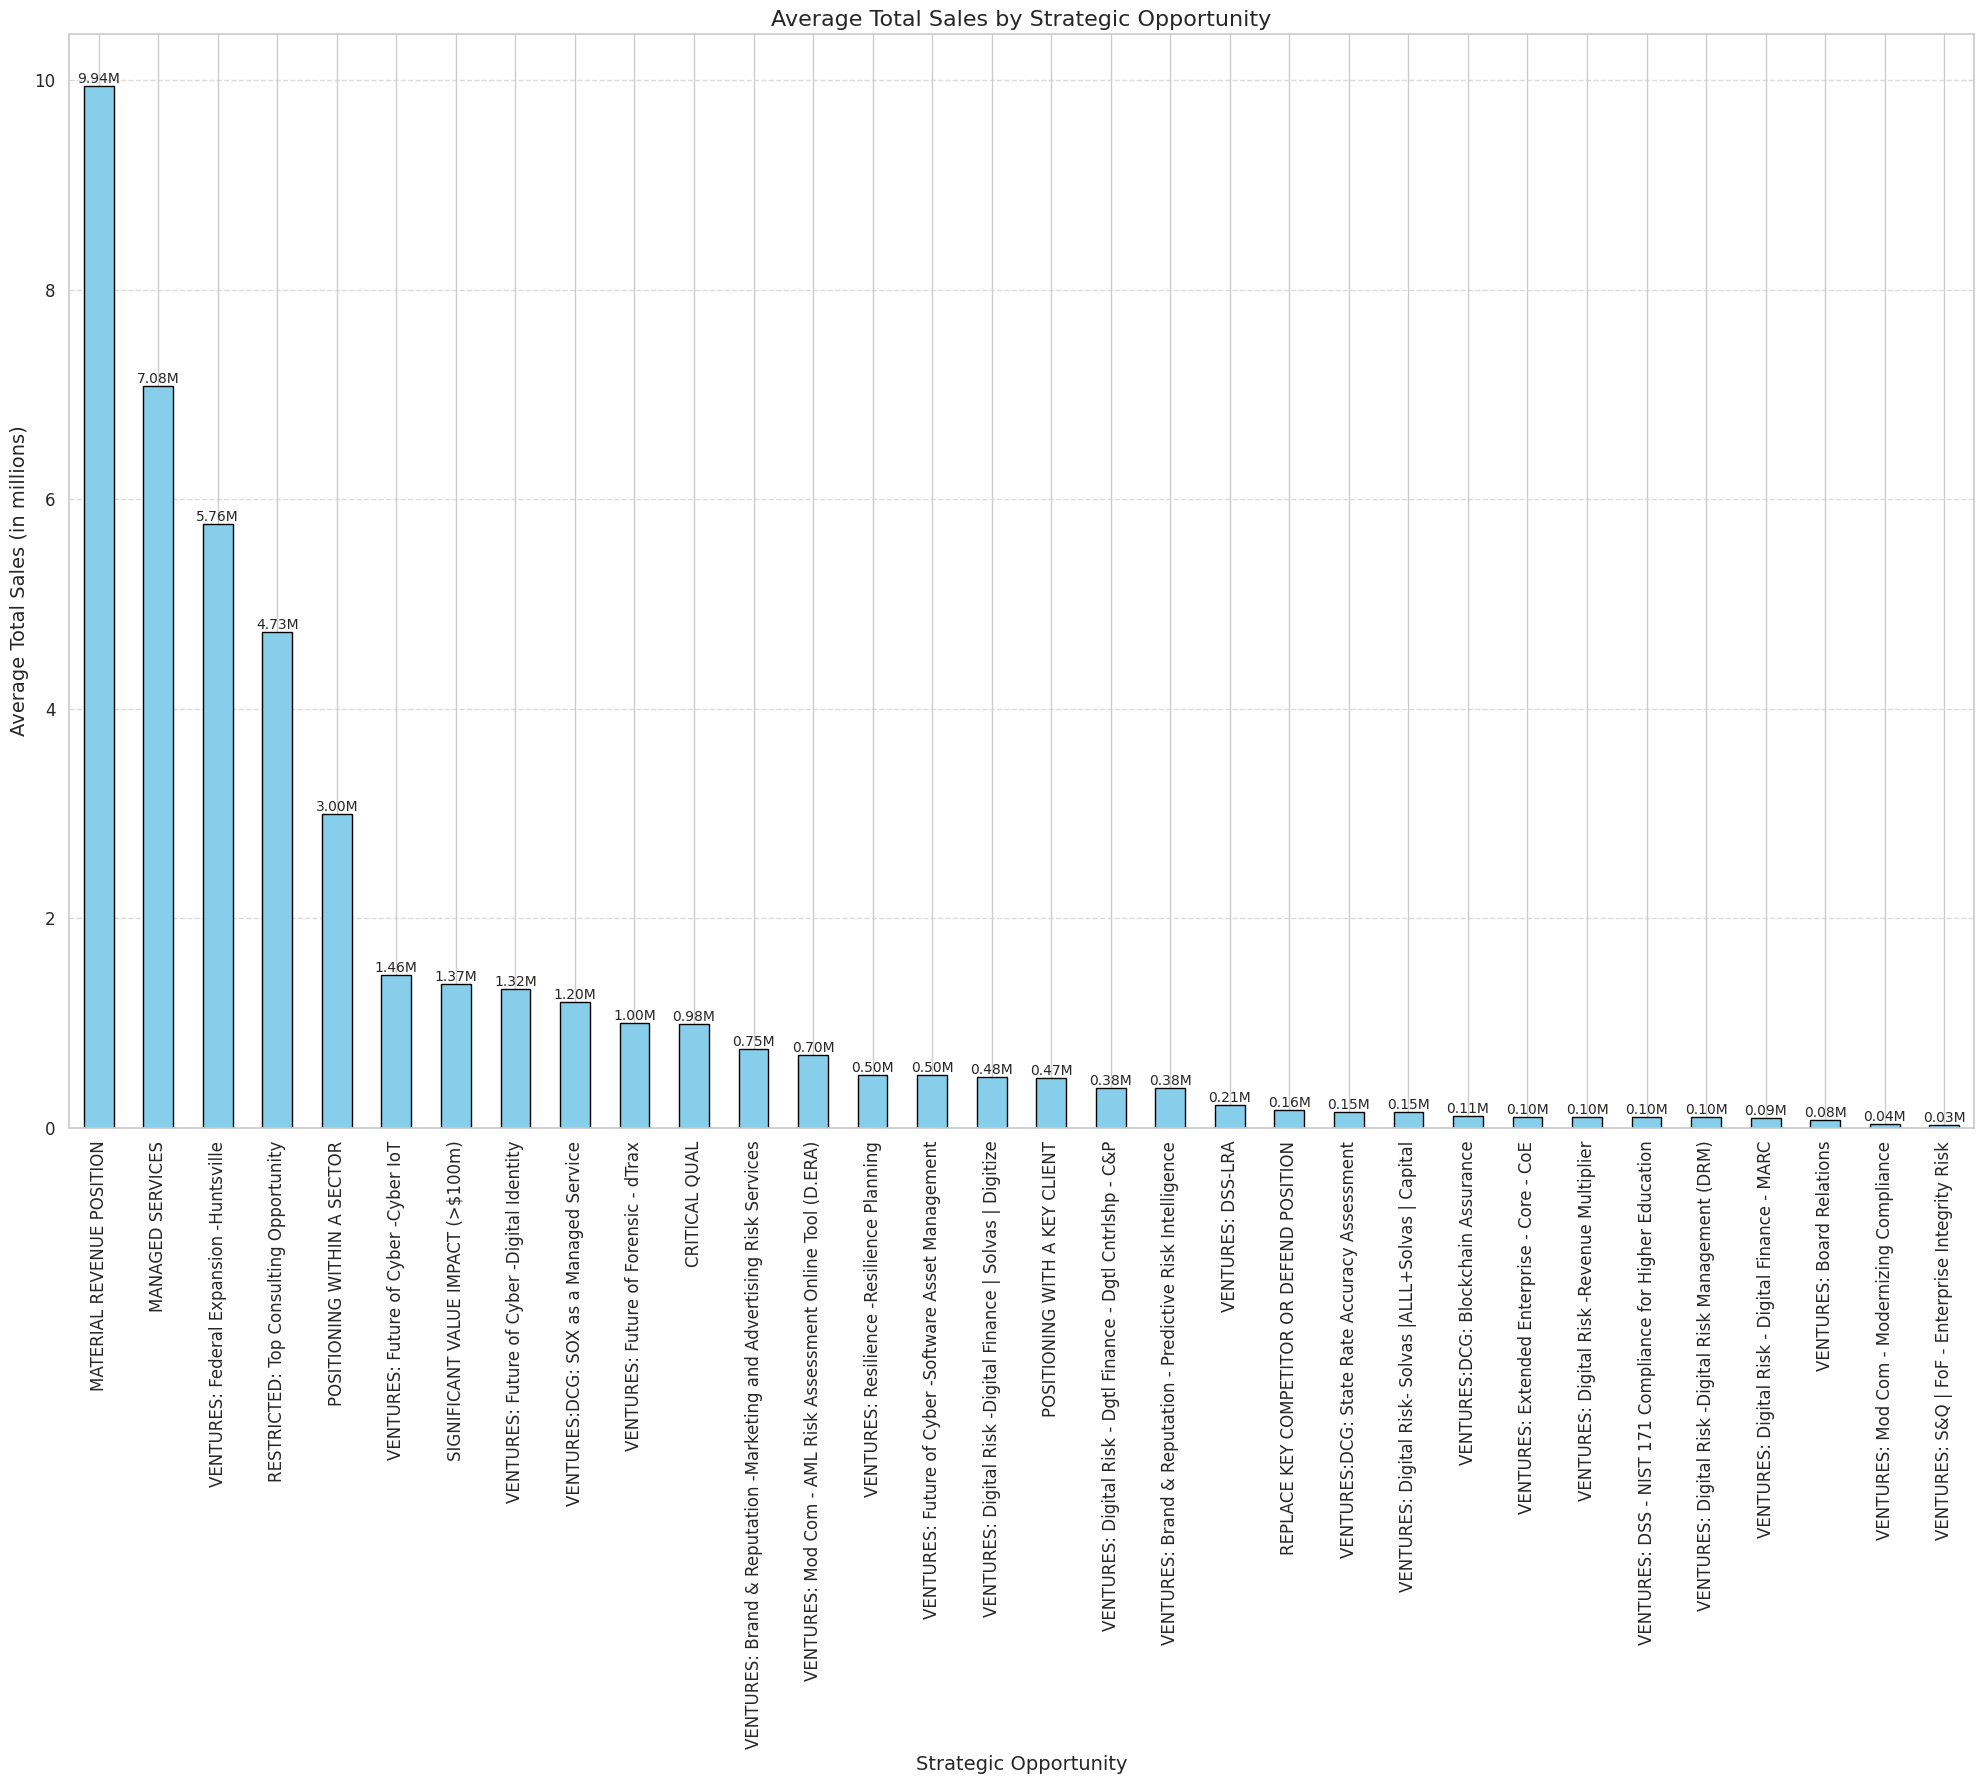

In [64]:

strategy_sales = df.groupby('STRATEGIC_OPPORTUNITY')['Total_Sales'].mean().sort_values(ascending=False) / 1000000

# Customize the plot
plt.figure(figsize=(20,18 ))
strategy_sales.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Total Sales by Strategic Opportunity', fontsize=16)
plt.xlabel('Strategic Opportunity', fontsize=14)
plt.ylabel('Average Total Sales (in millions)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels to the bars
for index, value in enumerate(strategy_sales):
    plt.text(index, value, f'{value:.2f}M', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [65]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(df['PROBABILITY_PRC'])

# Set the significance level (alpha)
alpha = 0.05

# Print the test result
print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the test result
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject H0)")
else:
    print("The data does not follow a normal distribution (reject H0)")

Shapiro-Wilk Test Statistic: 0.7728
P-value: 0.0000
The data does not follow a normal distribution (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [66]:
from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Calculate recency, Frequency, and Monetary Value
rfm_data = df.groupby('customer').agg({
    'DATE_WON_LOSS_ABANDONED': 'max',  # Most recent purchase date
    'OPPORTUNITY_ID': 'count',  # Count of purchases (frequency)
    'Total_Sales': 'sum'  # Total sales (monetary value)
})

# Rename the columns for clarity
rfm_data.rename(columns={
    'DATE_WON_LOSS_ABANDONED': 'Recency',
    'OPPORTUNITY_ID': 'Frequency',
    'Total_Sales': 'Monetary'
}, inplace=True)

# Convert the 'Recency' column to datetime
rfm_data['Recency'] = pd.to_datetime(rfm_data['Recency'])

# Calculate the most recent date in the dataset to calculate recency correctly
most_recent_date = rfm_data['Recency'].max()
# Calculate the number of days since the most recent purchase
rfm_data['Recency'] = (most_recent_date - rfm_data['Recency']).dt.days

# Impute missing values with the mean for Frequency and Monetary columns
imputer = SimpleImputer(strategy='mean')
rfm_data[['Frequency', 'Monetary']] = imputer.fit_transform(rfm_data[['Frequency', 'Monetary']])

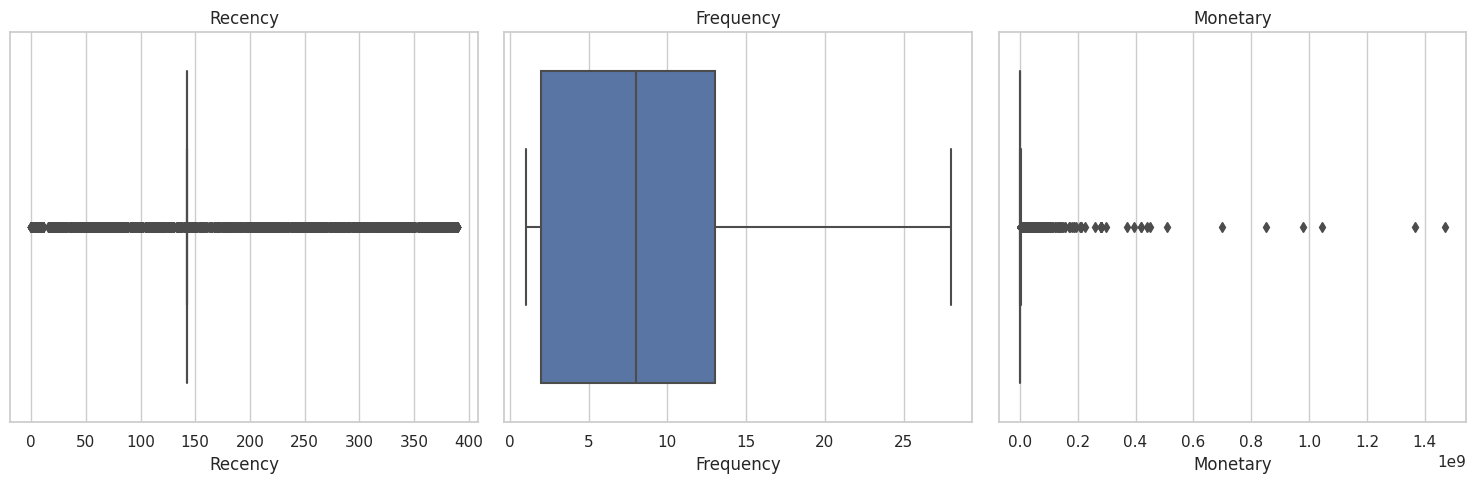

In [67]:
#  List of columns for which you want to create box plots
columns = ['Recency', 'Frequency', 'Monetary']

# Define the number of subplots and their arrangement (2x2 grid)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate through the columns and create box plots on the same line
for i, col in enumerate(columns):
    sns.boxplot(x=rfm_data[col], ax=axes[i])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [68]:


# Check for outliers using z-scores
z_threshold = 3  # Adjust this threshold as needed
z_scores = stats.zscore(rfm_data[['Recency', 'Frequency', 'Monetary']])

# Identify rows with z-scores exceeding the threshold for any of the three metrics
outliers = rfm_data[(z_scores > z_threshold).any(axis=1)]

print("Outliers:")
print(outliers)

Outliers:
            Recency  Frequency     Monetary
customer                                   
24000237.0      382       14.0    1260000.0
24000285.0      142       20.0  100000000.0
24000300.0      142       28.0         28.0
24000591.0      389        4.0     300000.0
24000633.0      142       28.0    4200000.0
...             ...        ...          ...
24465780.0      142       12.0   99600000.0
24469293.0      382        1.0          1.0
24470028.0      382        1.0          1.0
24470670.0      381        1.0      10500.0
24477705.0      380        1.0       1795.0

[252 rows x 3 columns]


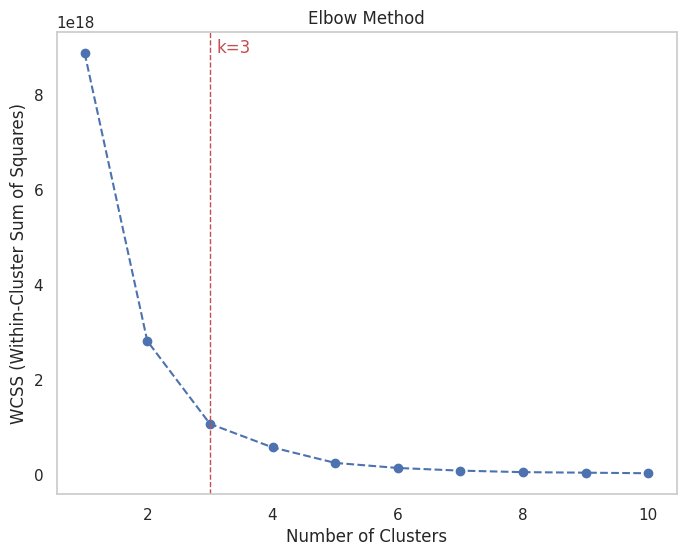

In [69]:
# Elbow Method to Find Optimal Number of Clusters (k)
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(outliers[['Recency', 'Frequency', 'Monetary']])
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()

# Highlight the optimal number of clusters (k=3) with a vertical line
optimal_k = 3
plt.axvline(x=optimal_k, color='r', linestyle='--', linewidth=1)
plt.text(optimal_k + 0.1, max(wcss) - 2000, 'k=3', color='r')

plt.show()



In [70]:

rfm_data = outliers  # Rename the DataFrame if needed

# Extract the RFM metrics
rfm_metrics = rfm_data[['Recency', 'Frequency', 'Monetary']]  # Extract the relevant columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
rfm_standardized = scaler.fit_transform(rfm_metrics)

# Create a DataFrame with standardized data
rfm_standardized_df = pd.DataFrame(rfm_standardized, columns=['Recency', 'Frequency', 'Monetary'])

# Add customer identifiers back to the DataFrame if needed
rfm_standardized_df['customer'] = rfm_data.reset_index()['customer']

# Check the standardized data
print("Standardized RFM Data:")
print(rfm_standardized_df)


Standardized RFM Data:
      Recency  Frequency  Monetary    customer
0    0.743933   0.309515 -0.395048  24000237.0
1   -1.319686   1.026187  0.131004  24000285.0
2   -1.319686   1.981750 -0.401760  24000300.0
3    0.804122  -0.884938 -0.400162  24000591.0
4   -1.319686   1.981750 -0.379384  24000633.0
..        ...        ...       ...         ...
247 -1.319686   0.070624  0.128873  24465780.0
248  0.743933  -1.243274 -0.401760  24469293.0
249  0.743933  -1.243274 -0.401760  24470028.0
250  0.735335  -1.243274 -0.401704  24470670.0
251  0.726737  -1.243274 -0.401751  24477705.0

[252 rows x 4 columns]


In [71]:
#  Customer Segmentation
# Fit the K-Means model
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
rfm_standardized_df['Cluster'] = kmeans.fit_predict(rfm_standardized_df[['Recency', 'Frequency', 'Monetary']])
# We can explore the segments by analyzing the cluster assignments.
# Optionally, we can label the segments for better understanding
segment_labels = ['Low priority', 'Mid priority', 'High priority']
rfm_standardized_df['Segment'] = rfm_standardized_df['Cluster'].map({i: label for i, label in enumerate(segment_labels)})

# Now, 'rfm_data' contains the customer segments based on RFM metrics.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **B4.1**

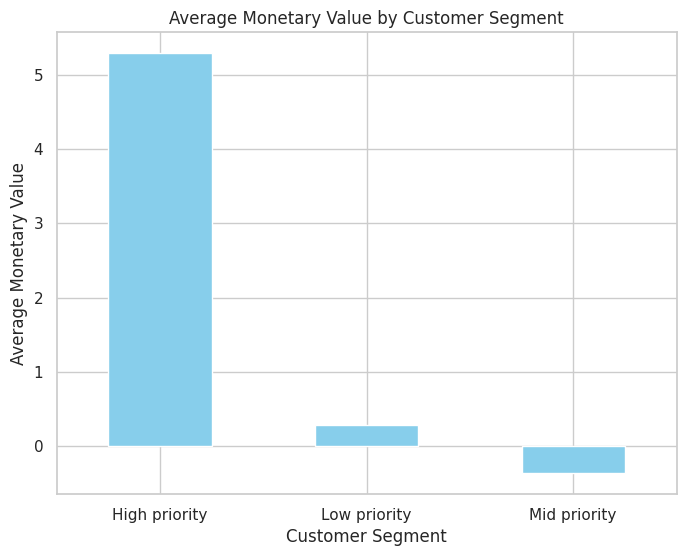

In [72]:
# Group by segment and calculate the mean monetary value for each segment
segment_monetary = rfm_standardized_df.groupby('Segment')['Monetary'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(8, 6))
segment_monetary.plot(kind='bar', color='skyblue')
plt.xlabel('Customer Segment')
plt.ylabel('Average Monetary Value')
plt.title('Average Monetary Value by Customer Segment')
plt.xticks(rotation=0)
plt.show()

In [73]:
# Assuming rfm_standardized_df is your DataFrame
high_priority_customers = rfm_standardized_df[rfm_standardized_df['Segment'] == 'High priority']

# Print the customers with 'High priority' segment
high_priority_customers['customer']
# rfm_standardized_df['customer']

45     24006978.0
67     24011466.0
97     24019848.0
119    24026067.0
180    24050919.0
195    24062220.0
Name: customer, dtype: float64

In [74]:
df.columns

Index(['SNAPSHOT_FISCAL_YEAR', 'SNAPSHOT_FISCAL_YEAR_PERIOD', 'customer',
       'customer_TEXT', 'customer_INDUSTRY_DESC', 'customer_OFFICE_DESC',
       'customer_REGION_DESC', 'customer_SECTOR_DESC', 'customer_SIC_TEXT',
       'customer_SUB_SECTOR_DESC', 'OPPORTUNITY_OPEN_CLOSED_INDICATOR',
       'PHASE_NAME', 'PURSUIT_START_DATE', 'PROJECT_START_DATE',
       'PROJECT_END_DATE', 'PERIOD_WON_LOSS_ABANDONED',
       'DATE_WON_LOSS_ABANDONED', 'PRIORITY', 'PURSUIT_LEADER',
       'BUYER_ROLE_DESC', 'CURRENCY', 'PROBABILITY_PRC', 'WEIGHTED_Sales',
       'Total_Sales', 'STRATEGIC_OPPORTUNITY', 'OPPORTUNITY_ID'],
      dtype='object')

In [75]:


h_prior= df[df['customer'].isin(high_priority_customers['customer'])]
h_prior[['OPPORTUNITY_OPEN_CLOSED_INDICATOR','PHASE_NAME','customer_TEXT', 'customer_INDUSTRY_DESC', 'customer_OFFICE_DESC','Total_Sales', 'STRATEGIC_OPPORTUNITY']]

,OPPORTUNITY_OPEN_CLOSED_INDICATOR,PHASE_NAME,customer_TEXT,customer_INDUSTRY_DESC,customer_OFFICE_DESC,Total_Sales,STRATEGIC_OPPORTUNITY
611,OPEN,phase 6,customer6500,Industry5,OKLAHOMA,74500000.0,POSITIONING WITH A KEY CLIENT
2476,OPEN,phase 1,customer11760,Industry4,BIRMINGHAM,70000000.0,POSITIONING WITH A KEY CLIENT
4488,OPEN,phase 4,customer11765,Industry4,HARTFORD,80401500.0,POSITIONING WITH A KEY CLIENT
5256,OPEN,phase 4,customer11765,Industry4,HARTFORD,80401500.0,POSITIONING WITH A KEY CLIENT
8854,OPEN,phase 1,customer11760,Industry4,BIRMINGHAM,70000000.0,POSITIONING WITH A KEY CLIENT
...,...,...,...,...,...,...,...
93609,OPEN,phase 6,customer6500,Industry5,OKLAHOMA,74500000.0,POSITIONING WITH A KEY CLIENT
94269,OPEN,phase 4,customer11765,Industry4,HARTFORD,80401500.0,POSITIONING WITH A KEY CLIENT
95228,OPEN,phase 1,customer11760,Industry4,BIRMINGHAM,70000000.0,POSITIONING WITH A KEY CLIENT
95461,OPEN,phase 6,customer11770,Industry4,BOISE,50000000.0,POSITIONING WITH A KEY CLIENT


In [96]:
df.columns

Index(['SNAPSHOT_FISCAL_YEAR', 'SNAPSHOT_FISCAL_YEAR_PERIOD', 'customer',
       'customer_TEXT', 'customer_INDUSTRY_DESC', 'customer_OFFICE_DESC',
       'customer_REGION_DESC', 'customer_SECTOR_DESC', 'customer_SIC_TEXT',
       'customer_SUB_SECTOR_DESC', 'OPPORTUNITY_OPEN_CLOSED_INDICATOR',
       'PHASE_NAME', 'PURSUIT_START_DATE', 'PROJECT_START_DATE',
       'PROJECT_END_DATE', 'PERIOD_WON_LOSS_ABANDONED',
       'DATE_WON_LOSS_ABANDONED', 'PRIORITY', 'PURSUIT_LEADER',
       'BUYER_ROLE_DESC', 'CURRENCY', 'PROBABILITY_PRC', 'WEIGHTED_Sales',
       'Total_Sales', 'STRATEGIC_OPPORTUNITY', 'OPPORTUNITY_ID'],
      dtype='object')

In [77]:
features= [ 'customer',
  'customer_TEXT',
  'customer_INDUSTRY_DESC',
  'customer_OFFICE_DESC',
  'customer_REGION_DESC',
  'customer_SECTOR_DESC',
  'customer_SIC_TEXT',
  'customer_SUB_SECTOR_DESC',
  'OPPORTUNITY_OPEN_CLOSED_INDICATOR',
  'PHASE_NAME',
   'PRIORITY',
  'PURSUIT_LEADER',
  'BUYER_ROLE_DESC',
  'PROBABILITY_PRC',
  'WEIGHTED_Sales',
       'Total_Sales',
   'STRATEGIC_OPPORTUNITY']
ml= df[features]


In [78]:
from sklearn.preprocessing import LabelEncoder



In [79]:


# Select object columns
object_cols = ml.select_dtypes(include=['object']).columns

# Apply label encoding to object columns
label_encoders = {}
for col in object_cols:
    label_encoders[col] = LabelEncoder()
    ml[col] = label_encoders[col].fit_transform(ml[col])


<ipython-input-79-f573f02e9533>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml[col] = label_encoders[col].fit_transform(ml[col])
<ipython-input-79-f573f02e9533>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml[col] = label_encoders[col].fit_transform(ml[col])
<ipython-input-79-f573f02e9533>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [80]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = ml.drop(columns=['Total_Sales'])
y = ml['Total_Sales']

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize features
X_scaled = scaler.fit_transform(X)


In [81]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [82]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict on the test data
predictions = rf.predict(X_test)


In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Calculate R-squared (R2) score
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2) Score: {r2:.2f}')

Mean Absolute Error (MAE): 14516.60
Mean Squared Error (MSE): 58256729174.14
R-squared (R2) Score: 0.99


In [84]:
# Predictions on the training data
train_predictions = rf.predict(X_train)

# Calculate MAE, MSE, and R-squared for training data
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

print(f'Training Data Metrics:')
print(f'Mean Absolute Error (MAE): {train_mae:.2f}')
print(f'Mean Squared Error (MSE): {train_mse:.2f}')
print(f'R-squared (R2) Score: {train_r2:.2f}')

# Calculate MAE, MSE, and R-squared for test data
print('\nTest Data Metrics:')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')


Training Data Metrics:
Mean Absolute Error (MAE): 4796.89
Mean Squared Error (MSE): 5917861290.15
R-squared (R2) Score: 1.00

Test Data Metrics:
Mean Absolute Error (MAE): 14516.60
Mean Squared Error (MSE): 58256729174.14
R-squared (R2) Score: 0.99


Based on the training and test data metrics, here's the analysis:

**Training Data:**
- **Mean Absolute Error (MAE):** 4796.89
- **Mean Squared Error (MSE):** 5917861290.15
- **R-squared (R2) Score:** 1.00

**Test Data:**
- **Mean Absolute Error (MAE):** 14516.60
- **Mean Squared Error (MSE):** 58256729174.14
- **R-squared (R2) Score:** 0.99


The model has performed exceptionally well on the training data, achieving a perfect fit (R2 score of 1.00). However, on the test data, while the R2 score is still very high (0.99), indicating that the model explains most of the variance, the MAE and MSE values are significantly higher, suggesting larger prediction errors in terms of absolute and squared differences, respectively.

The high R2 score on the test data suggests that the model captures the underlying patterns in the data. However, the relatively high MAE and MSE on the test data compared to the training data indicate that the model might be overfitting to some specific patterns in the training data. To address this, we could consider techniques like cross-validation, or hyperparameter tuning to achieve better generalization to unseen data. Additionally, exploring the data for outliers or other data quality issues might provide further insights into the model's performance.

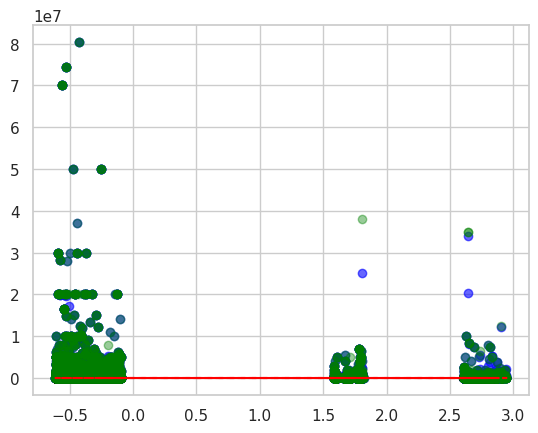

In [85]:
# Selecting the first feature from X_test for visualization
plt.scatter(X_test[:, 0], predictions, color='blue', alpha=.6,label='Predicted Sales')
plt.scatter(X_test[:, 0], y_test, color='green', alpha=.4,label='Actual Sales')
plt.plot(X_test[:, 0], X_test[:, 0], color='red', linestyle='--', label='Perfect Prediction')


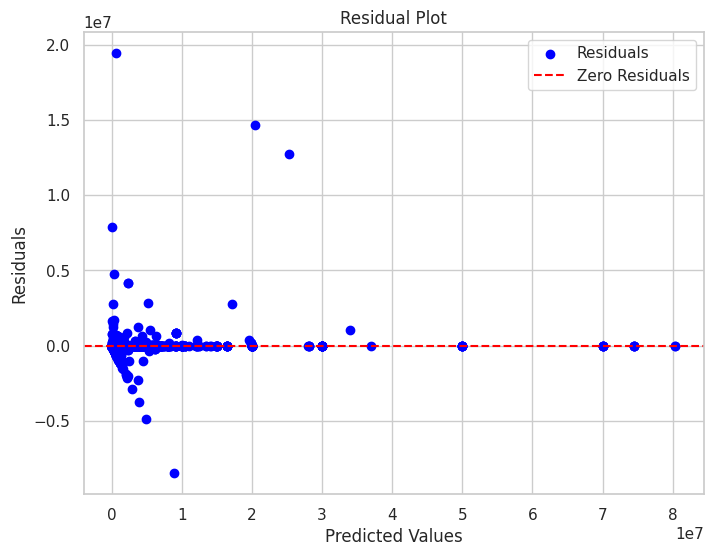

In [86]:
# Calculate residuals
residuals = y_test - predictions

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()


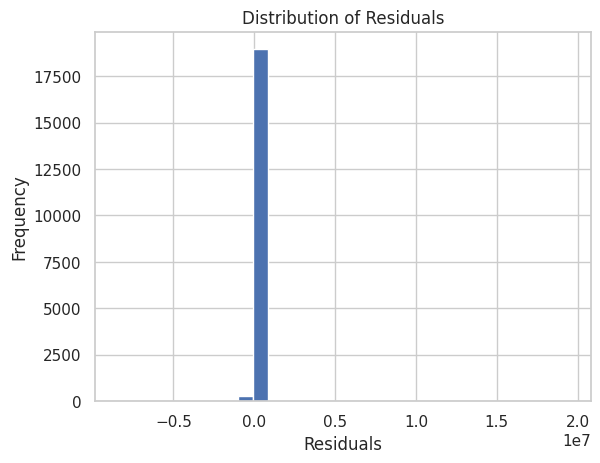

In [87]:
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


In [88]:
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


                                   importance
WEIGHTED_Sales                       0.401379
customer_OFFICE_DESC                 0.161599
PURSUIT_LEADER                       0.106566
customer_SIC_TEXT                    0.095830
PROBABILITY_PRC                      0.094900
customer                             0.043076
customer_TEXT                        0.037077
customer_SUB_SECTOR_DESC             0.015448
customer_SECTOR_DESC                 0.011046
customer_REGION_DESC                 0.007733
STRATEGIC_OPPORTUNITY                0.007371
customer_INDUSTRY_DESC               0.006675
PRIORITY                             0.004144
PHASE_NAME                           0.004138
OPPORTUNITY_OPEN_CLOSED_INDICATOR    0.002052
BUYER_ROLE_DESC                      0.000966


In [92]:
# Reshape predictions to 2D array before descaling
predictions_reshaped = rf.predict(X_test).reshape(-1, 1)

# Descale the predictions to match the original scale of Total_Sales
predictions_descaled = scaler.inverse_transform(np.hstack([X_test[:, 1:], predictions_reshaped]))[:, -1]

# Create a DataFrame with actual y_test and descaled predictions
result_df = pd.DataFrame({
    'Actual_Total_Sales': y_test.values,  # Actual y_test values
    'Predicted_Total_Sales': predictions_descaled  - mae #   rule of thumb / Descaled predictions
})

# Print or inspect the result DataFrame
print(result_df.head())



   Actual_Total_Sales  Predicted_Total_Sales
0             60000.0           7.426624e+04
1            300000.0           4.342088e+05
2             10000.0           4.439276e+02
3             28500.0           2.811514e+04
4           1000000.0           1.481228e+06


In our analysis, we delved into various aspects of the sales data, exploring product performance and customer behavior. Specifically, in Figures A1.1, A2.1, A3.2, and A4, we meticulously presented the products with the highest sales within categories 2, 3, and 4. These visuals not only pinpoint the top-performing products but also provide valuable insights into market trends.

Furthermore, our investigation extended to regional analysis, emphasizing the significance of focusing on specific regions with the highest potential. A1.2 highlighted the paramount importance of concentrating efforts on regions such as Washington D.C. and Chicago, which exhibited robust market standing. This strategic focus on high-opportunity regions is crucial for maximizing sales and expanding market reach.

In addition to geographical emphasis, our study underscored the importance of analyzing successful strategies. Figure B3.1, among other graphs, shed light on the strategies that proved to be most effective. By understanding these successful tactics, the client can tailor their approaches, ensuring a higher likelihood of success in future endeavors.

Furthermore, we highlighted the significance of nurturing and retaining loyal customers. In B4.1, we identified faithful, active customers, such as customer11765 and customer11760, who consistently contribute to sales. Fostering relationships with these customers can lead to long-term profitability and brand loyalty.

Moreover, our analysis delved into feature importance, revealing the top 5 influential factors. WEIGHTED_Sales emerged as the most crucial determinant, indicating its substantial impact on overall sales. Additionally, customer-related factors such as customer_OFFICE_DESC and PURSUIT_LEADER played significant roles. Understanding the influence of these features empowers the client to prioritize their efforts and resources effectively.

In summary, our comprehensive analysis guides the client towards strategic decision-making. By focusing on high-opportunity regions, understanding successful strategies, nurturing loyal customers, and prioritizing key features, the client can optimize their sales approach, enhance customer relationships, and ultimately, achieve sustained business growth.